In [2]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
import matplotlib.pyplot as plt

from crowd_nav.imitate import *

## Training

In [14]:
args_baseline = \
{'policy' : 'sail', 'batch_size' : 128, 
'auxiliary_task' : '', 'gpu' : True, 
'output_dir' : 'data/full_data_tests/baseline/imitate', 'num_epoch' : 200}

In [15]:
_ = imitate(args_change=args_baseline)

Folder already exists, continuing from last saved model
Path : data/full_data_tests/baseline/imitate-baseline-data-0.5-notraj
2020-12-30 22:15:33, INFO:  =========================== 
2020-12-30 22:15:33, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 22:15:33, INFO: Using device: cuda
2020-12-30 22:15:33, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 22:15:34, INFO: +: 0 - 146377
2020-12-30 22:15:34, INFO: val_indices: 292756 - 418221
2020-12-30 22:15:34, INFO: Auxiliary task 
Sampling : social


Epoch #0: loss = (0.0646, 0.0575), task = (0.0646, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0566, 0.0555), task = (0.0566, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0548, 0.0546), task = (0.0548, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0539, 0.0556), task = (0.0539, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0531, 0.0548), task = (0.0531, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0525, 0.0534), task = (0.0525, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0519, 0.0526), task = (0.0519, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0513, 0.0529), task = (0.0513, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0508, 0.0530), task = (0.0508, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0503, 0.0514), task = (0.0503, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0498, 0.0513), task = (0.0498, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0494, 0.0519), task = (0.0494, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0490, 0.0518), task = (0.0490, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0486, 0.0503), task = (0.0486, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0482, 0.0513), task = (0.0482, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0480, 0.0503), task = (0.0480, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0477, 0.0499), task = (0.0477, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0474, 0.0506), task = (0.0474, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0471, 0.0509), task = (0.0471, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0469, 0.0507), task = (0.0469, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0467, 0.0499), task = (0.0467, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0465, 0.0505), task = (0.0465, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0463, 0.0498), task = (0.0463, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0461, 0.0499), task = (0.0461, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0458, 0.0499), task = (0.0458, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0457, 0.0499), task = (0.0457, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0456, 0.0497), task = (0.0456, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0453, 0.0500), task = (0.0453, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0452, 0.0500), task = (0.0452, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0450, 0.0500), task = (0.0450, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0449, 0.0500), task = (0.0449, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0447, 0.0501), task = (0.0447, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0445, 0.0497), task = (0.0445, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0445, 0.0501), task = (0.0445, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0444, 0.0499), task = (0.0444, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0442, 0.0501), task = (0.0442, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0439, 0.0511), task = (0.0439, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0440, 0.0501), task = (0.0440, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0436, 0.0498), task = (0.0436, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0437, 0.0504), task = (0.0437, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0435, 0.0499), task = (0.0435, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0434, 0.0514), task = (0.0434, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0433, 0.0504), task = (0.0433, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0432, 0.0504), task = (0.0432, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0430, 0.0500), task = (0.0430, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0430, 0.0500), task = (0.0430, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0429, 0.0505), task = (0.0429, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0427, 0.0501), task = (0.0427, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0425, 0.0503), task = (0.0425, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0424, 0.0509), task = (0.0424, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0424, 0.0504), task = (0.0424, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0423, 0.0506), task = (0.0423, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0422, 0.0504), task = (0.0422, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0421, 0.0501), task = (0.0421, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0420, 0.0505), task = (0.0420, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0419, 0.0507), task = (0.0419, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0418, 0.0504), task = (0.0418, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0418, 0.0516), task = (0.0418, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0418, 0.0504), task = (0.0418, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0417, 0.0512), task = (0.0417, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0416, 0.0509), task = (0.0416, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0414, 0.0505), task = (0.0414, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0412, 0.0501), task = (0.0412, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0412, 0.0507), task = (0.0412, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0412, 0.0507), task = (0.0412, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0411, 0.0508), task = (0.0411, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0410, 0.0515), task = (0.0410, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0408, 0.0515), task = (0.0408, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0407, 0.0512), task = (0.0407, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0407, 0.0512), task = (0.0407, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0406, 0.0525), task = (0.0406, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0405, 0.0518), task = (0.0405, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0405, 0.0509), task = (0.0405, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0404, 0.0519), task = (0.0404, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0403, 0.0512), task = (0.0403, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0402, 0.0511), task = (0.0402, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0401, 0.0515), task = (0.0401, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0401, 0.0518), task = (0.0401, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0401, 0.0514), task = (0.0401, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0400, 0.0514), task = (0.0400, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0401, 0.0514), task = (0.0401, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0399, 0.0528), task = (0.0399, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0398, 0.0516), task = (0.0398, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0398, 0.0518), task = (0.0398, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0399, 0.0519), task = (0.0399, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0396, 0.0515), task = (0.0396, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0395, 0.0517), task = (0.0395, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0394, 0.0514), task = (0.0394, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0395, 0.0517), task = (0.0395, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0394, 0.0520), task = (0.0394, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0394, 0.0523), task = (0.0394, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0393, 0.0518), task = (0.0393, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0391, 0.0525), task = (0.0391, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0391, 0.0529), task = (0.0391, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0391, 0.0523), task = (0.0391, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0389, 0.0524), task = (0.0389, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0391, 0.0519), task = (0.0391, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0388, 0.0523), task = (0.0388, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0386, 0.0526), task = (0.0386, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0387, 0.0531), task = (0.0387, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0386, 0.0531), task = (0.0386, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0386, 0.0530), task = (0.0386, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0385, 0.0527), task = (0.0385, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0385, 0.0532), task = (0.0385, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0384, 0.0523), task = (0.0384, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0383, 0.0526), task = (0.0383, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0384, 0.0532), task = (0.0384, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0384, 0.0536), task = (0.0384, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0383, 0.0525), task = (0.0383, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0382, 0.0526), task = (0.0382, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0380, 0.0526), task = (0.0380, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0380, 0.0535), task = (0.0380, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0381, 0.0530), task = (0.0381, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0379, 0.0524), task = (0.0379, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0381, 0.0533), task = (0.0381, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0378, 0.0526), task = (0.0378, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0378, 0.0531), task = (0.0378, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0379, 0.0531), task = (0.0379, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0376, 0.0536), task = (0.0376, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0377, 0.0526), task = (0.0377, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0376, 0.0535), task = (0.0376, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0375, 0.0534), task = (0.0375, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0376, 0.0530), task = (0.0376, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0373, 0.0537), task = (0.0373, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0374, 0.0534), task = (0.0374, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0373, 0.0537), task = (0.0373, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0372, 0.0533), task = (0.0372, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0374, 0.0533), task = (0.0374, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0373, 0.0543), task = (0.0373, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0373, 0.0534), task = (0.0373, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0372, 0.0545), task = (0.0372, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0372, 0.0539), task = (0.0372, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0371, 0.0534), task = (0.0371, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0371, 0.0532), task = (0.0371, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0372, 0.0548), task = (0.0372, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0369, 0.0545), task = (0.0369, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0368, 0.0533), task = (0.0368, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0368, 0.0547), task = (0.0368, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0368, 0.0536), task = (0.0368, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0367, 0.0558), task = (0.0367, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0367, 0.0542), task = (0.0367, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0367, 0.0550), task = (0.0367, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0366, 0.0540), task = (0.0366, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0367, 0.0544), task = (0.0367, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0368, 0.0542), task = (0.0368, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0366, 0.0547), task = (0.0366, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0364, 0.0536), task = (0.0364, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0366, 0.0540), task = (0.0366, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0364, 0.0541), task = (0.0364, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0364, 0.0544), task = (0.0364, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0363, 0.0544), task = (0.0363, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0363, 0.0548), task = (0.0363, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0364, 0.0562), task = (0.0364, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0362, 0.0546), task = (0.0362, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0362, 0.0548), task = (0.0362, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0362, 0.0545), task = (0.0362, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0362, 0.0557), task = (0.0362, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0361, 0.0543), task = (0.0361, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0361, 0.0547), task = (0.0361, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0361, 0.0553), task = (0.0361, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0360, 0.0554), task = (0.0360, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0360, 0.0546), task = (0.0360, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0359, 0.0553), task = (0.0359, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0360, 0.0562), task = (0.0360, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0358, 0.0554), task = (0.0358, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0357, 0.0548), task = (0.0357, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0358, 0.0550), task = (0.0358, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0359, 0.0546), task = (0.0359, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0358, 0.0552), task = (0.0358, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0358, 0.0550), task = (0.0358, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0358, 0.0548), task = (0.0358, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0358, 0.0554), task = (0.0358, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0356, 0.0556), task = (0.0356, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0356, 0.0546), task = (0.0356, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0356, 0.0543), task = (0.0356, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0355, 0.0547), task = (0.0355, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0356, 0.0560), task = (0.0356, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0354, 0.0551), task = (0.0354, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0355, 0.0546), task = (0.0355, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0356, 0.0553), task = (0.0356, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0354, 0.0547), task = (0.0354, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0355, 0.0551), task = (0.0355, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0353, 0.0548), task = (0.0353, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0354, 0.0550), task = (0.0354, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0353, 0.0566), task = (0.0353, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0353, 0.0550), task = (0.0353, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0354, 0.0561), task = (0.0354, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0353, 0.0551), task = (0.0353, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0350, 0.0559), task = (0.0350, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0350, 0.0553), task = (0.0350, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0351, 0.0550), task = (0.0351, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0353, 0.0552), task = (0.0353, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0350, 0.0556), task = (0.0350, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0351, 0.0561), task = (0.0351, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0351, 0.0558), task = (0.0351, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0349, 0.0561), task = (0.0349, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0348, 0.0551), task = (0.0348, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0351, 0.0567), task = (0.0351, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0350, 0.0559), task = (0.0350, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0349, 0.0557), task = (0.0349, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


In [16]:
args_cont = \
{'policy' : 'sail', 'batch_size' : 128, 'contrast_weight' : 2.0, 'contrast_sampling' : 'event',
'auxiliary_task' : 'contrastive', 'gpu' : True, 
'output_dir' : 'data/full_data_tests/contrastive/imitate', 'num_epoch' : 200}

In [17]:
_ = imitate(args_change=args_cont)

Folder already exists, continuing from last saved model
Path : data/full_data_tests/contrastive/imitate-event-data-0.5-weight-2.0-horizon-4-temperature-0.20-nboundary-0-notraj
2020-12-30 23:20:42, INFO:  =========================== 
2020-12-30 23:20:42, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 23:20:42, INFO: Using device: cuda
2020-12-30 23:20:42, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 23:20:42, INFO: +: 0 - 146377
2020-12-30 23:20:42, INFO: val_indices: 292756 - 418221
2020-12-30 23:20:42, INFO: Auxiliary task contrastive
Sampling : event


Epoch #0: loss = (1.0295, 0.3830), task = (0.0702, 0.0609), nce = (0.4797, 0.1611), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.3593, 0.3487), task = (0.0601, 0.0598), nce = (0.1496, 0.1444), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.3189, 0.3072), task = (0.0582, 0.0583), nce = (0.1303, 0.1244), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.2914, 0.2896), task = (0.0567, 0.0554), nce = (0.1173, 0.1171), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.2733, 0.2699), task = (0.0551, 0.0548), nce = (0.1091, 0.1076), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.2626, 0.2679), task = (0.0540, 0.0550), nce = (0.1043, 0.1064), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.2572, 0.2580), task = (0.0535, 0.0536), nce = (0.1019, 0.1022), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.2522, 0.2564), task = (0.0528, 0.0533), nce = (0.0997, 0.1016), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.2481, 0.2551), task = (0.0522, 0.0528), nce = (0.0980, 0.1011), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.2470, 0.2508), task = (0.0519, 0.0519), nce = (0.0976, 0.0994), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.2438, 0.2562), task = (0.0514, 0.0530), nce = (0.0962, 0.1016), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.2418, 0.2507), task = (0.0511, 0.0520), nce = (0.0953, 0.0994), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.2395, 0.2482), task = (0.0509, 0.0517), nce = (0.0943, 0.0982), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.2378, 0.2454), task = (0.0504, 0.0514), nce = (0.0937, 0.0970), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.2358, 0.2442), task = (0.0500, 0.0517), nce = (0.0929, 0.0962), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.2351, 0.2431), task = (0.0499, 0.0509), nce = (0.0926, 0.0961), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.2334, 0.2421), task = (0.0496, 0.0517), nce = (0.0919, 0.0952), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.2321, 0.2389), task = (0.0494, 0.0507), nce = (0.0913, 0.0941), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.2309, 0.2428), task = (0.0491, 0.0509), nce = (0.0909, 0.0960), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.2296, 0.2482), task = (0.0490, 0.0505), nce = (0.0903, 0.0989), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.2284, 0.2419), task = (0.0487, 0.0504), nce = (0.0898, 0.0957), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.2284, 0.2388), task = (0.0486, 0.0505), nce = (0.0899, 0.0941), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.2276, 0.2464), task = (0.0485, 0.0508), nce = (0.0896, 0.0978), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.2265, 0.2387), task = (0.0482, 0.0497), nce = (0.0891, 0.0945), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.2251, 0.2410), task = (0.0480, 0.0504), nce = (0.0885, 0.0953), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.2256, 0.2377), task = (0.0479, 0.0499), nce = (0.0889, 0.0939), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.2238, 0.2412), task = (0.0478, 0.0505), nce = (0.0880, 0.0954), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.2242, 0.2356), task = (0.0477, 0.0496), nce = (0.0883, 0.0930), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.2226, 0.2357), task = (0.0475, 0.0495), nce = (0.0876, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.2221, 0.2386), task = (0.0475, 0.0502), nce = (0.0873, 0.0942), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.2207, 0.2401), task = (0.0473, 0.0496), nce = (0.0867, 0.0952), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.2199, 0.2330), task = (0.0471, 0.0494), nce = (0.0864, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.2188, 0.2405), task = (0.0471, 0.0499), nce = (0.0859, 0.0953), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.2181, 0.2339), task = (0.0469, 0.0495), nce = (0.0856, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.2176, 0.2452), task = (0.0470, 0.0520), nce = (0.0853, 0.0966), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.2173, 0.2385), task = (0.0469, 0.0498), nce = (0.0852, 0.0943), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.2165, 0.2330), task = (0.0466, 0.0498), nce = (0.0850, 0.0916), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.2154, 0.2307), task = (0.0467, 0.0492), nce = (0.0843, 0.0908), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.2147, 0.2397), task = (0.0465, 0.0512), nce = (0.0841, 0.0942), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.2147, 0.2342), task = (0.0466, 0.0502), nce = (0.0841, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.2137, 0.2353), task = (0.0462, 0.0499), nce = (0.0837, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.2138, 0.2339), task = (0.0463, 0.0496), nce = (0.0838, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.2136, 0.2324), task = (0.0461, 0.0493), nce = (0.0837, 0.0915), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.2134, 0.2427), task = (0.0462, 0.0509), nce = (0.0836, 0.0959), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.2128, 0.2338), task = (0.0461, 0.0495), nce = (0.0833, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.2121, 0.2342), task = (0.0458, 0.0499), nce = (0.0831, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.2121, 0.2458), task = (0.0460, 0.0516), nce = (0.0831, 0.0971), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.2111, 0.2313), task = (0.0458, 0.0495), nce = (0.0827, 0.0909), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.2105, 0.2348), task = (0.0457, 0.0510), nce = (0.0824, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.2109, 0.2352), task = (0.0457, 0.0501), nce = (0.0826, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.2116, 0.2319), task = (0.0457, 0.0505), nce = (0.0830, 0.0907), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.2102, 0.2370), task = (0.0454, 0.0494), nce = (0.0824, 0.0938), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.2099, 0.2354), task = (0.0455, 0.0499), nce = (0.0822, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.2096, 0.2341), task = (0.0455, 0.0500), nce = (0.0820, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.2095, 0.2328), task = (0.0454, 0.0493), nce = (0.0820, 0.0917), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.2096, 0.2301), task = (0.0453, 0.0488), nce = (0.0821, 0.0906), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.2085, 0.2313), task = (0.0452, 0.0499), nce = (0.0816, 0.0907), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.2083, 0.2291), task = (0.0451, 0.0493), nce = (0.0816, 0.0899), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.2089, 0.2321), task = (0.0452, 0.0499), nce = (0.0819, 0.0911), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.2084, 0.2347), task = (0.0451, 0.0494), nce = (0.0817, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.2084, 0.2330), task = (0.0451, 0.0495), nce = (0.0817, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.2075, 0.2341), task = (0.0449, 0.0496), nce = (0.0813, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.2075, 0.2314), task = (0.0449, 0.0491), nce = (0.0813, 0.0912), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.2075, 0.2327), task = (0.0450, 0.0492), nce = (0.0813, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.2071, 0.2321), task = (0.0448, 0.0504), nce = (0.0811, 0.0909), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.2065, 0.2336), task = (0.0448, 0.0490), nce = (0.0809, 0.0923), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.2075, 0.2297), task = (0.0448, 0.0487), nce = (0.0814, 0.0905), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.2067, 0.2330), task = (0.0447, 0.0493), nce = (0.0810, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.2063, 0.2368), task = (0.0446, 0.0501), nce = (0.0808, 0.0933), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.2067, 0.2331), task = (0.0447, 0.0493), nce = (0.0810, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.2059, 0.2343), task = (0.0446, 0.0495), nce = (0.0807, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.2060, 0.2330), task = (0.0445, 0.0493), nce = (0.0807, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.2056, 0.2371), task = (0.0445, 0.0495), nce = (0.0806, 0.0938), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.2057, 0.2343), task = (0.0446, 0.0501), nce = (0.0805, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.2061, 0.2301), task = (0.0445, 0.0491), nce = (0.0808, 0.0905), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.2055, 0.2364), task = (0.0444, 0.0497), nce = (0.0805, 0.0934), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.2049, 0.2323), task = (0.0443, 0.0496), nce = (0.0803, 0.0913), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.2041, 0.2328), task = (0.0441, 0.0492), nce = (0.0800, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.2053, 0.2307), task = (0.0443, 0.0488), nce = (0.0805, 0.0909), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.2044, 0.2347), task = (0.0442, 0.0493), nce = (0.0801, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.2040, 0.2389), task = (0.0442, 0.0506), nce = (0.0799, 0.0941), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.2043, 0.2389), task = (0.0441, 0.0506), nce = (0.0801, 0.0942), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.2045, 0.2401), task = (0.0441, 0.0521), nce = (0.0802, 0.0940), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.2038, 0.2319), task = (0.0440, 0.0489), nce = (0.0799, 0.0915), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.2044, 0.2343), task = (0.0441, 0.0490), nce = (0.0802, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.2040, 0.2342), task = (0.0439, 0.0493), nce = (0.0801, 0.0925), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.2029, 0.2348), task = (0.0438, 0.0506), nce = (0.0796, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.2042, 0.2334), task = (0.0441, 0.0491), nce = (0.0800, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.2030, 0.2327), task = (0.0438, 0.0492), nce = (0.0796, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.2036, 0.2337), task = (0.0438, 0.0495), nce = (0.0799, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.2030, 0.2357), task = (0.0438, 0.0504), nce = (0.0796, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.2026, 0.2319), task = (0.0438, 0.0497), nce = (0.0794, 0.0911), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.2035, 0.2406), task = (0.0437, 0.0502), nce = (0.0799, 0.0952), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.2023, 0.2340), task = (0.0436, 0.0494), nce = (0.0794, 0.0923), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.2022, 0.2339), task = (0.0437, 0.0497), nce = (0.0793, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.2020, 0.2315), task = (0.0435, 0.0488), nce = (0.0793, 0.0914), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.2022, 0.2337), task = (0.0435, 0.0499), nce = (0.0793, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.2020, 0.2355), task = (0.0436, 0.0502), nce = (0.0792, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.2016, 0.2372), task = (0.0434, 0.0503), nce = (0.0791, 0.0934), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.2026, 0.2347), task = (0.0435, 0.0496), nce = (0.0796, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.2022, 0.2360), task = (0.0434, 0.0496), nce = (0.0794, 0.0932), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.2014, 0.2343), task = (0.0434, 0.0492), nce = (0.0790, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.2019, 0.2321), task = (0.0433, 0.0492), nce = (0.0793, 0.0914), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.2020, 0.2377), task = (0.0434, 0.0502), nce = (0.0793, 0.0938), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.2013, 0.2342), task = (0.0433, 0.0500), nce = (0.0790, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.2011, 0.2350), task = (0.0432, 0.0505), nce = (0.0789, 0.0923), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.2010, 0.2318), task = (0.0433, 0.0491), nce = (0.0789, 0.0913), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.2010, 0.2350), task = (0.0432, 0.0506), nce = (0.0789, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.2010, 0.2356), task = (0.0433, 0.0491), nce = (0.0788, 0.0933), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.2007, 0.2349), task = (0.0431, 0.0496), nce = (0.0788, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.2001, 0.2353), task = (0.0430, 0.0498), nce = (0.0786, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.2001, 0.2369), task = (0.0430, 0.0499), nce = (0.0785, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.2010, 0.2357), task = (0.0432, 0.0495), nce = (0.0789, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.2002, 0.2307), task = (0.0430, 0.0495), nce = (0.0786, 0.0906), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.2006, 0.2313), task = (0.0431, 0.0498), nce = (0.0788, 0.0908), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.2009, 0.2352), task = (0.0431, 0.0499), nce = (0.0789, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.1990, 0.2350), task = (0.0427, 0.0497), nce = (0.0781, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.1998, 0.2331), task = (0.0430, 0.0503), nce = (0.0784, 0.0914), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.1998, 0.2327), task = (0.0428, 0.0492), nce = (0.0785, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.1998, 0.2316), task = (0.0429, 0.0492), nce = (0.0784, 0.0912), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.1996, 0.2364), task = (0.0428, 0.0498), nce = (0.0784, 0.0933), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.1998, 0.2332), task = (0.0429, 0.0498), nce = (0.0784, 0.0917), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.1993, 0.2358), task = (0.0428, 0.0497), nce = (0.0782, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.1997, 0.2351), task = (0.0428, 0.0504), nce = (0.0784, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.1997, 0.2327), task = (0.0427, 0.0495), nce = (0.0785, 0.0916), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.1989, 0.2353), task = (0.0427, 0.0495), nce = (0.0781, 0.0929), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.1993, 0.2339), task = (0.0427, 0.0496), nce = (0.0783, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.1994, 0.2342), task = (0.0427, 0.0496), nce = (0.0784, 0.0923), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.1991, 0.2340), task = (0.0427, 0.0500), nce = (0.0782, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.1987, 0.2345), task = (0.0426, 0.0501), nce = (0.0780, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.1983, 0.2377), task = (0.0425, 0.0507), nce = (0.0779, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.1986, 0.2355), task = (0.0425, 0.0501), nce = (0.0780, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.1987, 0.2366), task = (0.0425, 0.0509), nce = (0.0781, 0.0928), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.1985, 0.2351), task = (0.0424, 0.0503), nce = (0.0780, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.1985, 0.2372), task = (0.0425, 0.0508), nce = (0.0780, 0.0932), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.1989, 0.2372), task = (0.0426, 0.0501), nce = (0.0782, 0.0936), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.1979, 0.2337), task = (0.0424, 0.0497), nce = (0.0778, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch   138: reducing learning rate of group 0 to 5.0000e-04.
Epoch #137: loss = (0.1983, 0.2349), task = (0.0424, 0.0502), nce = (0.0780, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.1917, 0.2315), task = (0.0406, 0.0494), nce = (0.0756, 0.0911), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.1908, 0.2326), task = (0.0403, 0.0495), nce = (0.0752, 0.0915), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.1911, 0.2332), task = (0.0403, 0.0497), nce = (0.0754, 0.0917), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.1903, 0.2338), task = (0.0401, 0.0499), nce = (0.0751, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.1905, 0.2348), task = (0.0401, 0.0499), nce = (0.0752, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.1904, 0.2342), task = (0.0401, 0.0502), nce = (0.0752, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.1900, 0.2343), task = (0.0400, 0.0499), nce = (0.0750, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.1902, 0.2337), task = (0.0400, 0.0498), nce = (0.0751, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.1897, 0.2325), task = (0.0398, 0.0497), nce = (0.0749, 0.0914), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.1899, 0.2333), task = (0.0399, 0.0499), nce = (0.0750, 0.0917), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.1899, 0.2341), task = (0.0398, 0.0501), nce = (0.0751, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.1897, 0.2378), task = (0.0398, 0.0502), nce = (0.0750, 0.0938), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.1896, 0.2349), task = (0.0398, 0.0506), nce = (0.0749, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.1893, 0.2354), task = (0.0397, 0.0504), nce = (0.0748, 0.0925), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.1895, 0.2335), task = (0.0396, 0.0498), nce = (0.0749, 0.0918), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.1892, 0.2348), task = (0.0396, 0.0502), nce = (0.0748, 0.0923), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.1893, 0.2341), task = (0.0396, 0.0500), nce = (0.0748, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.1890, 0.2348), task = (0.0395, 0.0509), nce = (0.0748, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.1895, 0.2355), task = (0.0396, 0.0506), nce = (0.0749, 0.0925), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.1889, 0.2376), task = (0.0394, 0.0505), nce = (0.0747, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.1889, 0.2349), task = (0.0395, 0.0507), nce = (0.0747, 0.0921), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.1889, 0.2349), task = (0.0395, 0.0500), nce = (0.0747, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.1887, 0.2350), task = (0.0393, 0.0509), nce = (0.0747, 0.0920), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.1888, 0.2373), task = (0.0393, 0.0510), nce = (0.0747, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.1886, 0.2363), task = (0.0394, 0.0502), nce = (0.0746, 0.0930), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.1887, 0.2345), task = (0.0393, 0.0507), nce = (0.0747, 0.0919), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.1886, 0.2363), task = (0.0392, 0.0512), nce = (0.0747, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.1886, 0.2354), task = (0.0393, 0.0509), nce = (0.0747, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.1885, 0.2349), task = (0.0392, 0.0502), nce = (0.0747, 0.0923), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.1882, 0.2372), task = (0.0391, 0.0509), nce = (0.0745, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.1882, 0.2356), task = (0.0391, 0.0508), nce = (0.0745, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.1884, 0.2360), task = (0.0392, 0.0502), nce = (0.0746, 0.0929), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.1885, 0.2372), task = (0.0392, 0.0509), nce = (0.0746, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.1883, 0.2359), task = (0.0391, 0.0507), nce = (0.0746, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.1881, 0.2364), task = (0.0391, 0.0507), nce = (0.0745, 0.0929), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.1882, 0.2371), task = (0.0390, 0.0510), nce = (0.0746, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.1877, 0.2365), task = (0.0390, 0.0509), nce = (0.0744, 0.0928), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.1879, 0.2359), task = (0.0389, 0.0508), nce = (0.0745, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.1881, 0.2381), task = (0.0390, 0.0511), nce = (0.0746, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.1880, 0.2380), task = (0.0390, 0.0509), nce = (0.0745, 0.0936), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.1879, 0.2357), task = (0.0389, 0.0512), nce = (0.0745, 0.0922), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.1877, 0.2372), task = (0.0388, 0.0518), nce = (0.0745, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.1879, 0.2366), task = (0.0389, 0.0515), nce = (0.0745, 0.0926), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.1875, 0.2388), task = (0.0389, 0.0518), nce = (0.0743, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.1873, 0.2377), task = (0.0387, 0.0510), nce = (0.0743, 0.0933), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.1876, 0.2378), task = (0.0388, 0.0511), nce = (0.0744, 0.0934), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.1871, 0.2378), task = (0.0387, 0.0512), nce = (0.0742, 0.0933), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.1878, 0.2383), task = (0.0388, 0.0515), nce = (0.0745, 0.0934), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.1873, 0.2387), task = (0.0387, 0.0514), nce = (0.0743, 0.0936), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.1876, 0.2371), task = (0.0387, 0.0510), nce = (0.0744, 0.0931), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.1872, 0.2372), task = (0.0386, 0.0515), nce = (0.0743, 0.0928), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.1875, 0.2385), task = (0.0387, 0.0516), nce = (0.0744, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.1874, 0.2391), task = (0.0386, 0.0511), nce = (0.0744, 0.0940), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.1873, 0.2380), task = (0.0386, 0.0515), nce = (0.0744, 0.0933), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.1872, 0.2368), task = (0.0386, 0.0514), nce = (0.0743, 0.0927), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.1871, 0.2371), task = (0.0385, 0.0511), nce = (0.0743, 0.0930), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.1873, 0.2375), task = (0.0385, 0.0512), nce = (0.0744, 0.0932), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch   196: reducing learning rate of group 0 to 2.5000e-04.
Epoch #195: loss = (0.1869, 0.2377), task = (0.0385, 0.0512), nce = (0.0742, 0.0932), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.1837, 0.2358), task = (0.0374, 0.0509), nce = (0.0732, 0.0924), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.1834, 0.2386), task = (0.0372, 0.0516), nce = (0.0731, 0.0935), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.1834, 0.2371), task = (0.0372, 0.0514), nce = (0.0731, 0.0929), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.1833, 0.2370), task = (0.0372, 0.0512), nce = (0.0731, 0.0929), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


In [25]:
args_traj = \
{'policy' : 'sail_traj_simple', 'batch_size' : 128, 'traj_length' : 4, 'traj_weight' : 2.5,
'auxiliary_task' : 'traj', 'gpu' : True, 
'output_dir' : 'data/full_data_tests/trajpred/imitate', 'num_epoch' : 200}

In [26]:
_ = imitate(args_change=args_traj)

Path : data/full_data_tests/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj
2020-12-31 09:18:36, INFO:  =========================== 
2020-12-31 09:18:36, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-31 09:18:36, INFO: Using device: cuda
2020-12-31 09:18:36, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-31 09:18:37, INFO: +: 0 - 146377
2020-12-31 09:18:37, INFO: val_indices: 292756 - 418221
2020-12-31 09:18:37, INFO: Auxiliary task traj
Sampling : social


Epoch #0: loss = (0.4097, 0.0779), task = (0.0646, 0.0576), nce = (0.0000, 0.0000), tpred = (0.1381, 0.0081), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0732, 0.0752), task = (0.0567, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0066, 0.0077), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0692, 0.0700), task = (0.0554, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0055), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0670, 0.0674), task = (0.0542, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0654, 0.0672), task = (0.0533, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0046), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0644, 0.0649), task = (0.0527, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0046), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0633, 0.0631), task = (0.0519, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0044), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0624, 0.0642), task = (0.0513, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0617, 0.0617), task = (0.0507, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0610, 0.0616), task = (0.0501, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0603, 0.0605), task = (0.0495, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0600, 0.0619), task = (0.0493, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0048), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0595, 0.0609), task = (0.0489, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0590, 0.0606), task = (0.0485, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0586, 0.0601), task = (0.0482, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0042), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0582, 0.0599), task = (0.0479, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0577, 0.0596), task = (0.0476, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0044), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0575, 0.0587), task = (0.0474, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0038), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0572, 0.0606), task = (0.0472, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0047), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0568, 0.0580), task = (0.0470, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0039), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0564, 0.0583), task = (0.0467, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0038), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0562, 0.0588), task = (0.0466, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0559, 0.0573), task = (0.0465, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0555, 0.0579), task = (0.0462, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0553, 0.0575), task = (0.0461, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0549, 0.0578), task = (0.0458, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0549, 0.0562), task = (0.0459, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0036), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0547, 0.0564), task = (0.0458, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0035), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0544, 0.0564), task = (0.0456, 0.0475), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0542, 0.0559), task = (0.0456, 0.0471), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0540, 0.0566), task = (0.0454, 0.0471), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0539, 0.0563), task = (0.0453, 0.0474), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0537, 0.0562), task = (0.0452, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0535, 0.0561), task = (0.0451, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0534, 0.0565), task = (0.0450, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0533, 0.0562), task = (0.0450, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0531, 0.0572), task = (0.0448, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0529, 0.0556), task = (0.0448, 0.0474), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0526, 0.0564), task = (0.0447, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0525, 0.0547), task = (0.0446, 0.0470), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0031), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0525, 0.0560), task = (0.0446, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0523, 0.0561), task = (0.0444, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0522, 0.0570), task = (0.0444, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0522, 0.0557), task = (0.0443, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0520, 0.0546), task = (0.0442, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0519, 0.0567), task = (0.0441, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0518, 0.0560), task = (0.0441, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0518, 0.0556), task = (0.0441, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0516, 0.0543), task = (0.0439, 0.0467), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0030), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0515, 0.0556), task = (0.0439, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0514, 0.0558), task = (0.0438, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0513, 0.0552), task = (0.0437, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0514, 0.0548), task = (0.0438, 0.0470), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0511, 0.0565), task = (0.0436, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0512, 0.0552), task = (0.0436, 0.0475), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0510, 0.0566), task = (0.0435, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0510, 0.0551), task = (0.0435, 0.0474), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0509, 0.0548), task = (0.0434, 0.0465), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0508, 0.0545), task = (0.0433, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0029), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0508, 0.0563), task = (0.0433, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0508, 0.0547), task = (0.0433, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0505, 0.0546), task = (0.0432, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0505, 0.0553), task = (0.0431, 0.0470), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0505, 0.0548), task = (0.0431, 0.0468), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0504, 0.0544), task = (0.0431, 0.0466), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0501, 0.0566), task = (0.0428, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0502, 0.0549), task = (0.0429, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0029), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0502, 0.0562), task = (0.0429, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0501, 0.0543), task = (0.0429, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0028), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0500, 0.0548), task = (0.0428, 0.0474), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0500, 0.0555), task = (0.0427, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0499, 0.0547), task = (0.0426, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0497, 0.0549), task = (0.0426, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0498, 0.0544), task = (0.0426, 0.0468), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0497, 0.0554), task = (0.0426, 0.0474), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0496, 0.0542), task = (0.0425, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0496, 0.0547), task = (0.0424, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0495, 0.0547), task = (0.0424, 0.0468), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0496, 0.0550), task = (0.0424, 0.0475), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0495, 0.0552), task = (0.0424, 0.0471), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0493, 0.0545), task = (0.0423, 0.0469), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0493, 0.0553), task = (0.0422, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0492, 0.0553), task = (0.0422, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0493, 0.0543), task = (0.0422, 0.0471), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0491, 0.0544), task = (0.0421, 0.0470), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0491, 0.0551), task = (0.0420, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0490, 0.0542), task = (0.0420, 0.0468), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0490, 0.0540), task = (0.0420, 0.0468), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0491, 0.0557), task = (0.0420, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0491, 0.0547), task = (0.0420, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0489, 0.0547), task = (0.0419, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0487, 0.0556), task = (0.0417, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0488, 0.0552), task = (0.0417, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0487, 0.0541), task = (0.0417, 0.0465), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0487, 0.0548), task = (0.0417, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0487, 0.0553), task = (0.0417, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0485, 0.0545), task = (0.0416, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0486, 0.0561), task = (0.0416, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0484, 0.0547), task = (0.0415, 0.0471), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0484, 0.0545), task = (0.0415, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0484, 0.0556), task = (0.0414, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0483, 0.0544), task = (0.0414, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0483, 0.0555), task = (0.0414, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0484, 0.0554), task = (0.0414, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0482, 0.0548), task = (0.0413, 0.0475), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0483, 0.0552), task = (0.0414, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0481, 0.0552), task = (0.0412, 0.0468), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0034), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0481, 0.0566), task = (0.0411, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0481, 0.0551), task = (0.0412, 0.0475), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0480, 0.0545), task = (0.0412, 0.0475), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0480, 0.0562), task = (0.0411, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0480, 0.0550), task = (0.0412, 0.0474), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0480, 0.0562), task = (0.0411, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0481, 0.0550), task = (0.0412, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0479, 0.0544), task = (0.0411, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0478, 0.0553), task = (0.0409, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0478, 0.0545), task = (0.0410, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0477, 0.0553), task = (0.0409, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0476, 0.0544), task = (0.0408, 0.0472), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0478, 0.0556), task = (0.0410, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0476, 0.0550), task = (0.0408, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0476, 0.0552), task = (0.0408, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0476, 0.0559), task = (0.0409, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0475, 0.0552), task = (0.0407, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0476, 0.0547), task = (0.0408, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0027), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0474, 0.0553), task = (0.0406, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0475, 0.0551), task = (0.0407, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0474, 0.0548), task = (0.0406, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0475, 0.0556), task = (0.0407, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0473, 0.0549), task = (0.0405, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0472, 0.0540), task = (0.0405, 0.0471), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0474, 0.0550), task = (0.0406, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0472, 0.0544), task = (0.0405, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0472, 0.0550), task = (0.0405, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0471, 0.0545), task = (0.0405, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0471, 0.0550), task = (0.0404, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0471, 0.0559), task = (0.0404, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0470, 0.0555), task = (0.0403, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0471, 0.0554), task = (0.0404, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0470, 0.0548), task = (0.0403, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0471, 0.0550), task = (0.0404, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0471, 0.0549), task = (0.0403, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0469, 0.0546), task = (0.0403, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0470, 0.0547), task = (0.0403, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0468, 0.0570), task = (0.0402, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0032), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0469, 0.0549), task = (0.0402, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0467, 0.0551), task = (0.0401, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0467, 0.0546), task = (0.0401, 0.0473), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0467, 0.0567), task = (0.0401, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0467, 0.0561), task = (0.0401, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0467, 0.0550), task = (0.0400, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0466, 0.0550), task = (0.0399, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0465, 0.0546), task = (0.0399, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0465, 0.0548), task = (0.0399, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0028), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0465, 0.0554), task = (0.0399, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0465, 0.0554), task = (0.0399, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0465, 0.0543), task = (0.0399, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0465, 0.0551), task = (0.0399, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0464, 0.0544), task = (0.0398, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0464, 0.0547), task = (0.0398, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0464, 0.0557), task = (0.0398, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0463, 0.0551), task = (0.0397, 0.0476), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0464, 0.0553), task = (0.0398, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0463, 0.0553), task = (0.0397, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0463, 0.0545), task = (0.0397, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0461, 0.0548), task = (0.0395, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0463, 0.0565), task = (0.0397, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0461, 0.0554), task = (0.0395, 0.0484), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0461, 0.0551), task = (0.0396, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0461, 0.0548), task = (0.0395, 0.0477), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0461, 0.0552), task = (0.0395, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0460, 0.0546), task = (0.0395, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0461, 0.0556), task = (0.0395, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0460, 0.0565), task = (0.0394, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0032), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0459, 0.0551), task = (0.0394, 0.0481), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0459, 0.0555), task = (0.0393, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0460, 0.0547), task = (0.0394, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0458, 0.0551), task = (0.0393, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0458, 0.0555), task = (0.0393, 0.0484), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0458, 0.0556), task = (0.0392, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0458, 0.0551), task = (0.0393, 0.0479), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0460, 0.0549), task = (0.0394, 0.0480), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0457, 0.0557), task = (0.0392, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0458, 0.0549), task = (0.0392, 0.0478), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0457, 0.0558), task = (0.0391, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0456, 0.0560), task = (0.0391, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0457, 0.0558), task = (0.0391, 0.0484), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0457, 0.0561), task = (0.0391, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0457, 0.0569), task = (0.0391, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0457, 0.0555), task = (0.0392, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0456, 0.0557), task = (0.0391, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0457, 0.0556), task = (0.0391, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0027), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0456, 0.0556), task = (0.0390, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0457, 0.0554), task = (0.0391, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0453, 0.0560), task = (0.0388, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0455, 0.0553), task = (0.0389, 0.0484), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0455, 0.0558), task = (0.0389, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0454, 0.0564), task = (0.0389, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0453, 0.0558), task = (0.0388, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0028), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0453, 0.0562), task = (0.0388, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


In [3]:
args_traj = \
{'policy' : 'sail_traj_simple', 'batch_size' : 128, 'traj_length' : 4, 'traj_weight' : 2.5,
'auxiliary_task' : 'traj', 'gpu' : True, 'percent_label': 1,
'output_dir' : 'data/output_mul/trajpred/imitate', 'num_epoch' : 100, 'memory_dir' : 'data/demonstrate_mul/aggressive/'}

In [4]:
_ = imitate(args_change=args_traj)

Folder already exists, continuing from last saved model
Path : data/output_mul/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj
2021-01-04 10:17:26, INFO:  =========================== 
2021-01-04 10:17:26, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2021-01-04 10:17:26, INFO: Using device: cuda
2021-01-04 10:17:26, INFO: Load data from data/demonstrate_mul/aggressive/data_imit_mem.pt
2021-01-04 10:17:28, INFO: +: 0 - 106134
2021-01-04 10:17:28, INFO: val_indices: 106135 - 108300
2021-01-04 10:17:28, INFO: Auxiliary task traj
Sampling : social


Epoch #0: loss = (0.5085, 0.1371), task = (0.0774, 0.0714), nce = (0.0000, 0.0000), tpred = (0.1724, 0.0263), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.1076, 0.1259), task = (0.0687, 0.0699), nce = (0.0000, 0.0000), tpred = (0.0155, 0.0224), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.1001, 0.1207), task = (0.0671, 0.0689), nce = (0.0000, 0.0000), tpred = (0.0132, 0.0207), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0970, 0.1206), task = (0.0660, 0.0678), nce = (0.0000, 0.0000), tpred = (0.0124, 0.0211), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0947, 0.1184), task = (0.0647, 0.0688), nce = (0.0000, 0.0000), tpred = (0.0120, 0.0198), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0929, 0.1166), task = (0.0636, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0117, 0.0207), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0915, 0.1167), task = (0.0628, 0.0650), nce = (0.0000, 0.0000), tpred = (0.0115, 0.0207), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0903, 0.1117), task = (0.0621, 0.0632), nce = (0.0000, 0.0000), tpred = (0.0113, 0.0194), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0889, 0.1099), task = (0.0612, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0111, 0.0189), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0878, 0.1100), task = (0.0606, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0109, 0.0192), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0869, 0.1107), task = (0.0602, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0107, 0.0195), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0862, 0.1083), task = (0.0597, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0106, 0.0190), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0851, 0.1076), task = (0.0591, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0104, 0.0187), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0846, 0.1084), task = (0.0588, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0103, 0.0188), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0839, 0.1058), task = (0.0584, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0102, 0.0180), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0832, 0.1067), task = (0.0580, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0100, 0.0184), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0823, 0.1074), task = (0.0576, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0099, 0.0180), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0819, 0.1097), task = (0.0573, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0098, 0.0190), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0813, 0.1040), task = (0.0570, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0097, 0.0181), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0809, 0.1037), task = (0.0567, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0097, 0.0177), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0804, 0.1051), task = (0.0565, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0095, 0.0182), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0799, 0.1031), task = (0.0563, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0094, 0.0177), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0794, 0.1040), task = (0.0560, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0094, 0.0181), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0792, 0.1038), task = (0.0558, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0094, 0.0172), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0790, 0.1011), task = (0.0558, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0093, 0.0172), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0783, 0.1023), task = (0.0555, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0091, 0.0169), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0778, 0.1018), task = (0.0552, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0090, 0.0172), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0774, 0.1049), task = (0.0551, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0089, 0.0182), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0769, 0.1048), task = (0.0548, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0180), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0761, 0.1011), task = (0.0548, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0085, 0.0163), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0754, 0.1010), task = (0.0545, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0166), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0753, 0.1074), task = (0.0544, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0083, 0.0190), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0747, 0.0997), task = (0.0541, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0164), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0745, 0.1019), task = (0.0540, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0082, 0.0171), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0742, 0.0996), task = (0.0538, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0161), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0739, 0.0988), task = (0.0537, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0161), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0736, 0.0982), task = (0.0535, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0159), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0736, 0.0977), task = (0.0536, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0157), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0732, 0.0995), task = (0.0533, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0161), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0731, 0.1004), task = (0.0533, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0165), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0728, 0.1011), task = (0.0531, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0173), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0724, 0.0968), task = (0.0529, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0078, 0.0158), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0723, 0.0992), task = (0.0529, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0078, 0.0159), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0720, 0.0985), task = (0.0526, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0078, 0.0159), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0718, 0.0953), task = (0.0525, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0077, 0.0156), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0716, 0.0993), task = (0.0524, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0077, 0.0162), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0713, 0.0993), task = (0.0522, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0076, 0.0163), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0711, 0.0984), task = (0.0521, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0076, 0.0156), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0710, 0.1017), task = (0.0521, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0076, 0.0178), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0708, 0.0958), task = (0.0519, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0076, 0.0155), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0707, 0.0956), task = (0.0518, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0076, 0.0155), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0707, 0.0982), task = (0.0519, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0075, 0.0160), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0702, 0.0987), task = (0.0516, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0074, 0.0157), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0703, 0.0986), task = (0.0516, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0075, 0.0158), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0701, 0.1020), task = (0.0514, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0075, 0.0172), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0702, 0.0978), task = (0.0516, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0074, 0.0160), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0698, 0.0961), task = (0.0514, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0074, 0.0152), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0698, 0.0970), task = (0.0512, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0074, 0.0152), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0694, 0.0967), task = (0.0511, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0073, 0.0155), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0694, 0.0970), task = (0.0509, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0074, 0.0159), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0691, 0.0965), task = (0.0509, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0073, 0.0153), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0688, 0.0976), task = (0.0507, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0073, 0.0154), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0688, 0.0992), task = (0.0506, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0073, 0.0158), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0687, 0.0972), task = (0.0505, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0073, 0.0156), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0687, 0.0967), task = (0.0506, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0152), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0685, 0.0972), task = (0.0505, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0155), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0684, 0.0972), task = (0.0504, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0151), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0681, 0.0966), task = (0.0502, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0149), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0682, 0.0983), task = (0.0502, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0160), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0683, 0.1011), task = (0.0504, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0160), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0680, 0.0984), task = (0.0501, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0072, 0.0155), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0676, 0.0967), task = (0.0498, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0150), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0676, 0.0999), task = (0.0499, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0151), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0675, 0.0961), task = (0.0498, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0150), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0675, 0.0966), task = (0.0499, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0149), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0673, 0.0961), task = (0.0497, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0150), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0673, 0.0994), task = (0.0497, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0157), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0671, 0.0980), task = (0.0495, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0151), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0669, 0.0969), task = (0.0493, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0151), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0668, 0.0972), task = (0.0493, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0150), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0668, 0.0963), task = (0.0494, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0150), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0666, 0.0959), task = (0.0491, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0146), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0665, 0.0981), task = (0.0491, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0148), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0665, 0.0972), task = (0.0492, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0154), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0660, 0.0968), task = (0.0488, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0152), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0665, 0.0991), task = (0.0490, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0160), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0661, 0.0987), task = (0.0488, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0153), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0661, 0.0967), task = (0.0489, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0151), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0659, 0.1013), task = (0.0488, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0167), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0659, 0.0969), task = (0.0487, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0149), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0656, 0.1000), task = (0.0486, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0068, 0.0151), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0658, 0.0976), task = (0.0486, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0150), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0658, 0.0979), task = (0.0486, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0069, 0.0153), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0652, 0.0979), task = (0.0483, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0150), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0655, 0.0994), task = (0.0485, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0068, 0.0149), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0651, 0.1004), task = (0.0484, 0.0626), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0151), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0651, 0.0990), task = (0.0483, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0157), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0650, 0.0998), task = (0.0482, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0154), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0649, 0.0987), task = (0.0482, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0146), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0648, 0.0972), task = (0.0480, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0067, 0.0147), upred = (0.0000, 0.0000)


## Testing

In [20]:
model_p ='data/full_data_tests/baseline/imitate-baseline-data-0.5-notraj/'
results_baseline = test(model_type='sail', model_path=model_p, n_episodes=500)

success: 0.33, collision: 0.67, nav time: 9.96, reward: -0.0073 +- 0.2529


success: 0.69, collision: 0.31, nav time: 10.16, reward: 0.1794 +- 0.2463


success: 0.60, collision: 0.40, nav time: 10.10, reward: 0.1385 +- 0.2538


success: 0.59, collision: 0.41, nav time: 10.01, reward: 0.1258 +- 0.2622


success: 0.58, collision: 0.42, nav time: 10.24, reward: 0.1155 +- 0.2625


success: 0.73, collision: 0.27, nav time: 10.64, reward: 0.1860 +- 0.2388


success: 0.87, collision: 0.13, nav time: 10.68, reward: 0.2586 +- 0.1724


success: 0.90, collision: 0.10, nav time: 10.69, reward: 0.2757 +- 0.1565


success: 0.85, collision: 0.15, nav time: 10.73, reward: 0.2492 +- 0.1838


success: 0.73, collision: 0.27, nav time: 10.42, reward: 0.1924 +- 0.2314


success: 0.84, collision: 0.16, nav time: 10.49, reward: 0.2489 +- 0.1892


success: 0.77, collision: 0.23, nav time: 10.55, reward: 0.2140 +- 0.2167


success: 0.78, collision: 0.22, nav time: 10.64, reward: 0.2190 +- 0.2114


success: 0.81, collision: 0.19, nav time: 10.30, reward: 0.2428 +- 0.2007


success: 0.80, collision: 0.20, nav time: 10.45, reward: 0.2301 +- 0.2112


success: 0.72, collision: 0.28, nav time: 10.33, reward: 0.1923 +- 0.2359


success: 0.77, collision: 0.23, nav time: 10.63, reward: 0.2074 +- 0.2155


success: 0.78, collision: 0.22, nav time: 10.46, reward: 0.2145 +- 0.2120


success: 0.83, collision: 0.17, nav time: 10.69, reward: 0.2400 +- 0.1889


success: 0.84, collision: 0.16, nav time: 10.48, reward: 0.2596 +- 0.1796


success: 0.80, collision: 0.20, nav time: 10.49, reward: 0.2277 +- 0.2115


success: 0.72, collision: 0.28, nav time: 10.45, reward: 0.1903 +- 0.2247


success: 0.77, collision: 0.23, nav time: 10.60, reward: 0.2146 +- 0.2087


success: 0.81, collision: 0.19, nav time: 10.67, reward: 0.2275 +- 0.2038


success: 0.84, collision: 0.16, nav time: 10.50, reward: 0.2486 +- 0.1907


success: 0.91, collision: 0.09, nav time: 10.51, reward: 0.2838 +- 0.1445


success: 0.83, collision: 0.17, nav time: 10.62, reward: 0.2455 +- 0.1933


success: 0.84, collision: 0.16, nav time: 10.79, reward: 0.2439 +- 0.1844


success: 0.85, collision: 0.15, nav time: 10.38, reward: 0.2584 +- 0.1782


success: 0.81, collision: 0.19, nav time: 10.44, reward: 0.2372 +- 0.1959


success: 0.81, collision: 0.19, nav time: 10.55, reward: 0.2317 +- 0.2027


success: 0.84, collision: 0.16, nav time: 10.34, reward: 0.2545 +- 0.1906


success: 0.81, collision: 0.19, nav time: 10.69, reward: 0.2296 +- 0.1981


success: 0.85, collision: 0.15, nav time: 10.59, reward: 0.2515 +- 0.1829


success: 0.85, collision: 0.15, nav time: 10.56, reward: 0.2551 +- 0.1829


success: 0.86, collision: 0.14, nav time: 10.56, reward: 0.2573 +- 0.1765


success: 0.81, collision: 0.19, nav time: 10.56, reward: 0.2363 +- 0.2007


success: 0.77, collision: 0.23, nav time: 10.43, reward: 0.2168 +- 0.2142


success: 0.73, collision: 0.27, nav time: 10.40, reward: 0.1967 +- 0.2260


In [5]:
model_p ='data/full_data_tests/baseline/imitate-baseline-data-0.5-notraj/'
results_baseline = test(model_type='sail', model_path=model_p, n_episodes=500)

success: 0.44, collision: 0.56, nav time: 10.00, reward: 0.0505 +- 0.2630


success: 0.80, collision: 0.20, nav time: 10.18, reward: 0.2368 +- 0.2152


success: 0.73, collision: 0.27, nav time: 10.00, reward: 0.2111 +- 0.2286


success: 0.67, collision: 0.33, nav time: 9.98, reward: 0.1709 +- 0.2474


success: 0.69, collision: 0.31, nav time: 10.18, reward: 0.1768 +- 0.2445


success: 0.81, collision: 0.19, nav time: 10.31, reward: 0.2365 +- 0.2122


success: 0.89, collision: 0.11, nav time: 10.48, reward: 0.2801 +- 0.1588


success: 0.93, collision: 0.07, nav time: 10.63, reward: 0.2950 +- 0.1362


success: 0.92, collision: 0.08, nav time: 10.62, reward: 0.2882 +- 0.1449


success: 0.81, collision: 0.19, nav time: 10.33, reward: 0.2358 +- 0.2104


success: 0.90, collision: 0.10, nav time: 10.38, reward: 0.2876 +- 0.1554


success: 0.88, collision: 0.12, nav time: 10.42, reward: 0.2748 +- 0.1657


success: 0.87, collision: 0.13, nav time: 10.54, reward: 0.2658 +- 0.1741


success: 0.89, collision: 0.11, nav time: 10.26, reward: 0.2845 +- 0.1629


success: 0.88, collision: 0.12, nav time: 10.33, reward: 0.2777 +- 0.1719


success: 0.87, collision: 0.13, nav time: 10.21, reward: 0.2733 +- 0.1773


success: 0.83, collision: 0.17, nav time: 10.36, reward: 0.2489 +- 0.1928


success: 0.87, collision: 0.13, nav time: 10.29, reward: 0.2695 +- 0.1784


success: 0.87, collision: 0.13, nav time: 10.52, reward: 0.2683 +- 0.1713


success: 0.89, collision: 0.11, nav time: 10.35, reward: 0.2890 +- 0.1563


success: 0.81, collision: 0.19, nav time: 10.31, reward: 0.2422 +- 0.2022


success: 0.82, collision: 0.18, nav time: 10.33, reward: 0.2456 +- 0.1962


success: 0.86, collision: 0.14, nav time: 10.46, reward: 0.2652 +- 0.1768


success: 0.87, collision: 0.13, nav time: 10.52, reward: 0.2652 +- 0.1757


success: 0.87, collision: 0.13, nav time: 10.36, reward: 0.2691 +- 0.1756


success: 0.86, collision: 0.14, nav time: 10.32, reward: 0.2683 +- 0.1774


success: 0.88, collision: 0.12, nav time: 10.31, reward: 0.2818 +- 0.1666


success: 0.90, collision: 0.10, nav time: 10.64, reward: 0.2779 +- 0.1586


success: 0.88, collision: 0.12, nav time: 10.32, reward: 0.2792 +- 0.1677


success: 0.86, collision: 0.14, nav time: 10.34, reward: 0.2693 +- 0.1740


success: 0.88, collision: 0.12, nav time: 10.38, reward: 0.2735 +- 0.1723


success: 0.86, collision: 0.14, nav time: 10.28, reward: 0.2709 +- 0.1788


success: 0.86, collision: 0.14, nav time: 10.49, reward: 0.2640 +- 0.1782


success: 0.88, collision: 0.12, nav time: 10.43, reward: 0.2760 +- 0.1673


success: 0.90, collision: 0.10, nav time: 10.44, reward: 0.2876 +- 0.1520


success: 0.88, collision: 0.12, nav time: 10.38, reward: 0.2747 +- 0.1691


success: 0.89, collision: 0.11, nav time: 10.41, reward: 0.2809 +- 0.1589


success: 0.87, collision: 0.13, nav time: 10.38, reward: 0.2722 +- 0.1717


success: 0.83, collision: 0.17, nav time: 10.36, reward: 0.2499 +- 0.1973


In [6]:
torch.save(results_baseline, 'data/full_data_tests/results_baseline.pth')

In [7]:
model_p ='data/full_data_tests/contrastive/imitate-event-data-0.5-weight-2.0-horizon-4-temperature-0.20-nboundary-0-notraj/'
results_contrastive = test(model_type='sail', model_path=model_p, n_episodes=500)

success: 0.71, collision: 0.29, nav time: 10.62, reward: 0.1946 +- 0.2171


success: 0.85, collision: 0.15, nav time: 10.17, reward: 0.2694 +- 0.1789


success: 0.90, collision: 0.10, nav time: 10.28, reward: 0.2916 +- 0.1531


success: 0.91, collision: 0.09, nav time: 10.43, reward: 0.2908 +- 0.1444


success: 0.92, collision: 0.08, nav time: 10.30, reward: 0.3054 +- 0.1344


success: 0.90, collision: 0.10, nav time: 10.18, reward: 0.2931 +- 0.1529


success: 0.84, collision: 0.16, nav time: 10.27, reward: 0.2654 +- 0.1795


success: 0.94, collision: 0.06, nav time: 10.28, reward: 0.3141 +- 0.1217


success: 0.93, collision: 0.07, nav time: 10.55, reward: 0.3022 +- 0.1253


success: 0.96, collision: 0.04, nav time: 10.38, reward: 0.3238 +- 0.0972


success: 0.92, collision: 0.07, nav time: 10.32, reward: 0.3030 +- 0.1319


success: 0.96, collision: 0.04, nav time: 10.41, reward: 0.3177 +- 0.1021


success: 0.97, collision: 0.03, nav time: 10.43, reward: 0.3275 +- 0.0854


success: 0.94, collision: 0.06, nav time: 10.33, reward: 0.3090 +- 0.1224


success: 0.95, collision: 0.05, nav time: 10.16, reward: 0.3232 +- 0.1122


success: 0.97, collision: 0.02, nav time: 10.45, reward: 0.3244 +- 0.0876


success: 0.95, collision: 0.04, nav time: 10.33, reward: 0.3197 +- 0.1053


success: 0.98, collision: 0.02, nav time: 10.32, reward: 0.3343 +- 0.0775


success: 0.93, collision: 0.07, nav time: 10.41, reward: 0.2998 +- 0.1317


success: 0.97, collision: 0.02, nav time: 10.38, reward: 0.3280 +- 0.0830


success: 0.97, collision: 0.03, nav time: 10.50, reward: 0.3209 +- 0.0905


success: 0.97, collision: 0.03, nav time: 10.44, reward: 0.3230 +- 0.0899


success: 0.94, collision: 0.06, nav time: 10.29, reward: 0.3113 +- 0.1206


success: 0.97, collision: 0.03, nav time: 10.45, reward: 0.3240 +- 0.0873


success: 0.95, collision: 0.04, nav time: 10.49, reward: 0.3135 +- 0.1079


success: 0.94, collision: 0.06, nav time: 10.22, reward: 0.3160 +- 0.1172


success: 0.97, collision: 0.03, nav time: 10.27, reward: 0.3308 +- 0.0890


success: 0.96, collision: 0.03, nav time: 10.38, reward: 0.3248 +- 0.0948


success: 0.97, collision: 0.02, nav time: 10.36, reward: 0.3302 +- 0.0841


success: 0.96, collision: 0.04, nav time: 10.24, reward: 0.3230 +- 0.1022


success: 0.96, collision: 0.03, nav time: 10.40, reward: 0.3241 +- 0.0942


success: 0.97, collision: 0.03, nav time: 10.27, reward: 0.3264 +- 0.0924


success: 0.96, collision: 0.04, nav time: 10.33, reward: 0.3223 +- 0.1011


success: 0.96, collision: 0.04, nav time: 10.36, reward: 0.3211 +- 0.1027


success: 0.97, collision: 0.02, nav time: 10.57, reward: 0.3239 +- 0.0822


success: 0.96, collision: 0.04, nav time: 10.24, reward: 0.3269 +- 0.1007


success: 0.97, collision: 0.03, nav time: 10.28, reward: 0.3299 +- 0.0865


success: 0.98, collision: 0.02, nav time: 10.30, reward: 0.3323 +- 0.0810


success: 0.96, collision: 0.04, nav time: 10.25, reward: 0.3240 +- 0.1022


In [8]:
torch.save(results_contrastive, 'data/full_data_tests/results_contrastive.pth')

In [9]:
model_p ='data/full_data_tests/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj/'
results_trajpred = test(model_type='sail_traj_simple', model_path=model_p, n_episodes=500)

success: 0.38, collision: 0.62, nav time: 9.97, reward: 0.0134 +- 0.2616


success: 0.78, collision: 0.22, nav time: 10.28, reward: 0.2183 +- 0.2162


success: 0.87, collision: 0.13, nav time: 10.29, reward: 0.2689 +- 0.1766


success: 0.96, collision: 0.04, nav time: 10.37, reward: 0.3203 +- 0.1049


success: 0.94, collision: 0.06, nav time: 10.14, reward: 0.3139 +- 0.1241


success: 0.93, collision: 0.07, nav time: 10.34, reward: 0.3048 +- 0.1333


success: 0.96, collision: 0.04, nav time: 10.08, reward: 0.3300 +- 0.1051


success: 0.96, collision: 0.04, nav time: 10.33, reward: 0.3247 +- 0.0964


success: 0.95, collision: 0.05, nav time: 10.32, reward: 0.3169 +- 0.1103


success: 0.92, collision: 0.08, nav time: 10.16, reward: 0.3028 +- 0.1381


success: 0.96, collision: 0.04, nav time: 10.45, reward: 0.3120 +- 0.1093


success: 0.95, collision: 0.05, nav time: 10.18, reward: 0.3123 +- 0.1182


success: 0.97, collision: 0.03, nav time: 10.34, reward: 0.3270 +- 0.0915


success: 0.97, collision: 0.03, nav time: 10.29, reward: 0.3270 +- 0.0910


success: 0.96, collision: 0.03, nav time: 10.21, reward: 0.3225 +- 0.1026


success: 0.96, collision: 0.04, nav time: 10.47, reward: 0.3147 +- 0.1032


success: 0.97, collision: 0.03, nav time: 10.30, reward: 0.3265 +- 0.0957


success: 0.93, collision: 0.07, nav time: 10.32, reward: 0.3009 +- 0.1427


success: 0.97, collision: 0.02, nav time: 10.56, reward: 0.3214 +- 0.0859


success: 0.95, collision: 0.05, nav time: 10.44, reward: 0.3116 +- 0.1199


success: 0.97, collision: 0.03, nav time: 10.25, reward: 0.3285 +- 0.0901


success: 0.96, collision: 0.04, nav time: 10.29, reward: 0.3239 +- 0.0999


success: 0.95, collision: 0.05, nav time: 10.47, reward: 0.3168 +- 0.1056


success: 0.90, collision: 0.10, nav time: 10.23, reward: 0.2881 +- 0.1597


success: 0.98, collision: 0.02, nav time: 10.44, reward: 0.3292 +- 0.0778


success: 0.98, collision: 0.02, nav time: 10.20, reward: 0.3345 +- 0.0814


success: 0.97, collision: 0.03, nav time: 10.55, reward: 0.3184 +- 0.0987


success: 0.97, collision: 0.03, nav time: 10.49, reward: 0.3162 +- 0.1054


success: 0.97, collision: 0.03, nav time: 10.34, reward: 0.3308 +- 0.0852


success: 0.96, collision: 0.04, nav time: 10.35, reward: 0.3236 +- 0.0978


success: 0.94, collision: 0.06, nav time: 10.16, reward: 0.3085 +- 0.1305


success: 0.96, collision: 0.04, nav time: 10.27, reward: 0.3245 +- 0.1017


success: 0.98, collision: 0.02, nav time: 10.47, reward: 0.3230 +- 0.0879


success: 0.96, collision: 0.04, nav time: 10.44, reward: 0.3159 +- 0.1070


success: 0.97, collision: 0.03, nav time: 10.48, reward: 0.3222 +- 0.0912


success: 0.97, collision: 0.03, nav time: 10.32, reward: 0.3286 +- 0.0860


success: 0.97, collision: 0.03, nav time: 10.48, reward: 0.3221 +- 0.0909


success: 0.97, collision: 0.03, nav time: 10.28, reward: 0.3269 +- 0.0950


success: 0.97, collision: 0.03, nav time: 10.29, reward: 0.3257 +- 0.0965


In [2]:
model_p ='data/output_mul/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj/'
env_mods = {'safety_space' : 0.03, 'time_horizon' : 1}
results_trajpred = test(model_type='sail_traj_simple', model_path=model_p, n_episodes=100, env_mods=env_mods)

success: 0.6400,collision: 0.3600,nav time: 11.91,reward: 0.1322, timeout : 0.0000


success: 0.7500,collision: 0.2500,nav time: 10.85,reward: 0.2044, timeout : 0.0000


success: 0.7800,collision: 0.2200,nav time: 10.90,reward: 0.2107, timeout : 0.0000


success: 0.8100,collision: 0.1900,nav time: 10.65,reward: 0.2399, timeout : 0.0000


success: 0.8400,collision: 0.1600,nav time: 10.21,reward: 0.2666, timeout : 0.0000


success: 0.8000,collision: 0.2000,nav time: 10.37,reward: 0.2387, timeout : 0.0000


success: 0.8400,collision: 0.1600,nav time: 11.17,reward: 0.2411, timeout : 0.0000


success: 0.8900,collision: 0.1100,nav time: 10.82,reward: 0.2740, timeout : 0.0000


success: 0.9100,collision: 0.0900,nav time: 10.90,reward: 0.2813, timeout : 0.0000


success: 0.8900,collision: 0.1100,nav time: 10.58,reward: 0.2837, timeout : 0.0000


success: 0.8300,collision: 0.1700,nav time: 10.45,reward: 0.2531, timeout : 0.0000


success: 0.9500,collision: 0.0500,nav time: 10.66,reward: 0.3094, timeout : 0.0000


success: 0.9300,collision: 0.0700,nav time: 10.81,reward: 0.2909, timeout : 0.0000


success: 0.9000,collision: 0.1000,nav time: 10.74,reward: 0.2862, timeout : 0.0000


success: 0.9100,collision: 0.0900,nav time: 11.07,reward: 0.2727, timeout : 0.0000


success: 0.9400,collision: 0.0600,nav time: 10.73,reward: 0.3051, timeout : 0.0000


success: 0.9000,collision: 0.1000,nav time: 10.81,reward: 0.2798, timeout : 0.0000


success: 0.9300,collision: 0.0700,nav time: 10.49,reward: 0.3046, timeout : 0.0000


success: 0.9200,collision: 0.0800,nav time: 10.40,reward: 0.3006, timeout : 0.0000


success: 0.8500,collision: 0.1500,nav time: 10.70,reward: 0.2570, timeout : 0.0000


FileNotFoundError: [Errno 2] No such file or directory: 'data/output_mul/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj/policy_net_104.pth'

In [10]:
#torch.save(results_trajpred, 'data/full_data_tests/results_trajpred.pth')

## Plots

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import torch
%matplotlib inline
cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=-1, vmax=4)

In [10]:
results = []
root = 'data/improvement/temp/'
env_dirs = os.listdir(root)
for env_dir in env_dirs :
    env_dir = os.path.join(root, env_dir)
    res = torch.load(os.path.join(env_dir, 'results.pth'))
    results.append(res)    

In [11]:
for res in results :
    res['last_epochs_res'] = {}
    for met in res['init_results'].keys() :
        avg = np.mean([r[1][met] for r in res['result_per_epoch']][-5:])
        res['last_epochs_res'][met] = avg

In [12]:
filtered_res = []
for res in results :
    if len(filtered_res) == 0 or (min(abs(r['init_results']['collision']-res['init_results']['collision']) for r in filtered_res)) > 1e-10 :
        filtered_res.append(res)

In [13]:
len(filtered_res)

29

In [14]:
results = filtered_res

In [15]:
traj_accuracy = [r['init_results']['traj accuracy'] for r in results]
collisions = np.asarray([1 - r['init_results']['success'] for r in results]) * 100
df = pd.DataFrame({'collision' : collisions, 'trajectory_loss' : traj_accuracy, 'name' : 'Environments'})

In [16]:
traj_accuracy_aft = [r['last_epochs_res']['traj accuracy'] for r in results]
collisions_aft = np.asarray([1 - r['last_epochs_res']['success'] for r in results]) * 100
df_aft = pd.DataFrame({'collision' : collisions_aft, 'trajectory_loss' : traj_accuracy_aft, 'name' : 'Environments'})

In [17]:
y + dy

NameError: name 'y' is not defined

No handles with labels found to put in legend.


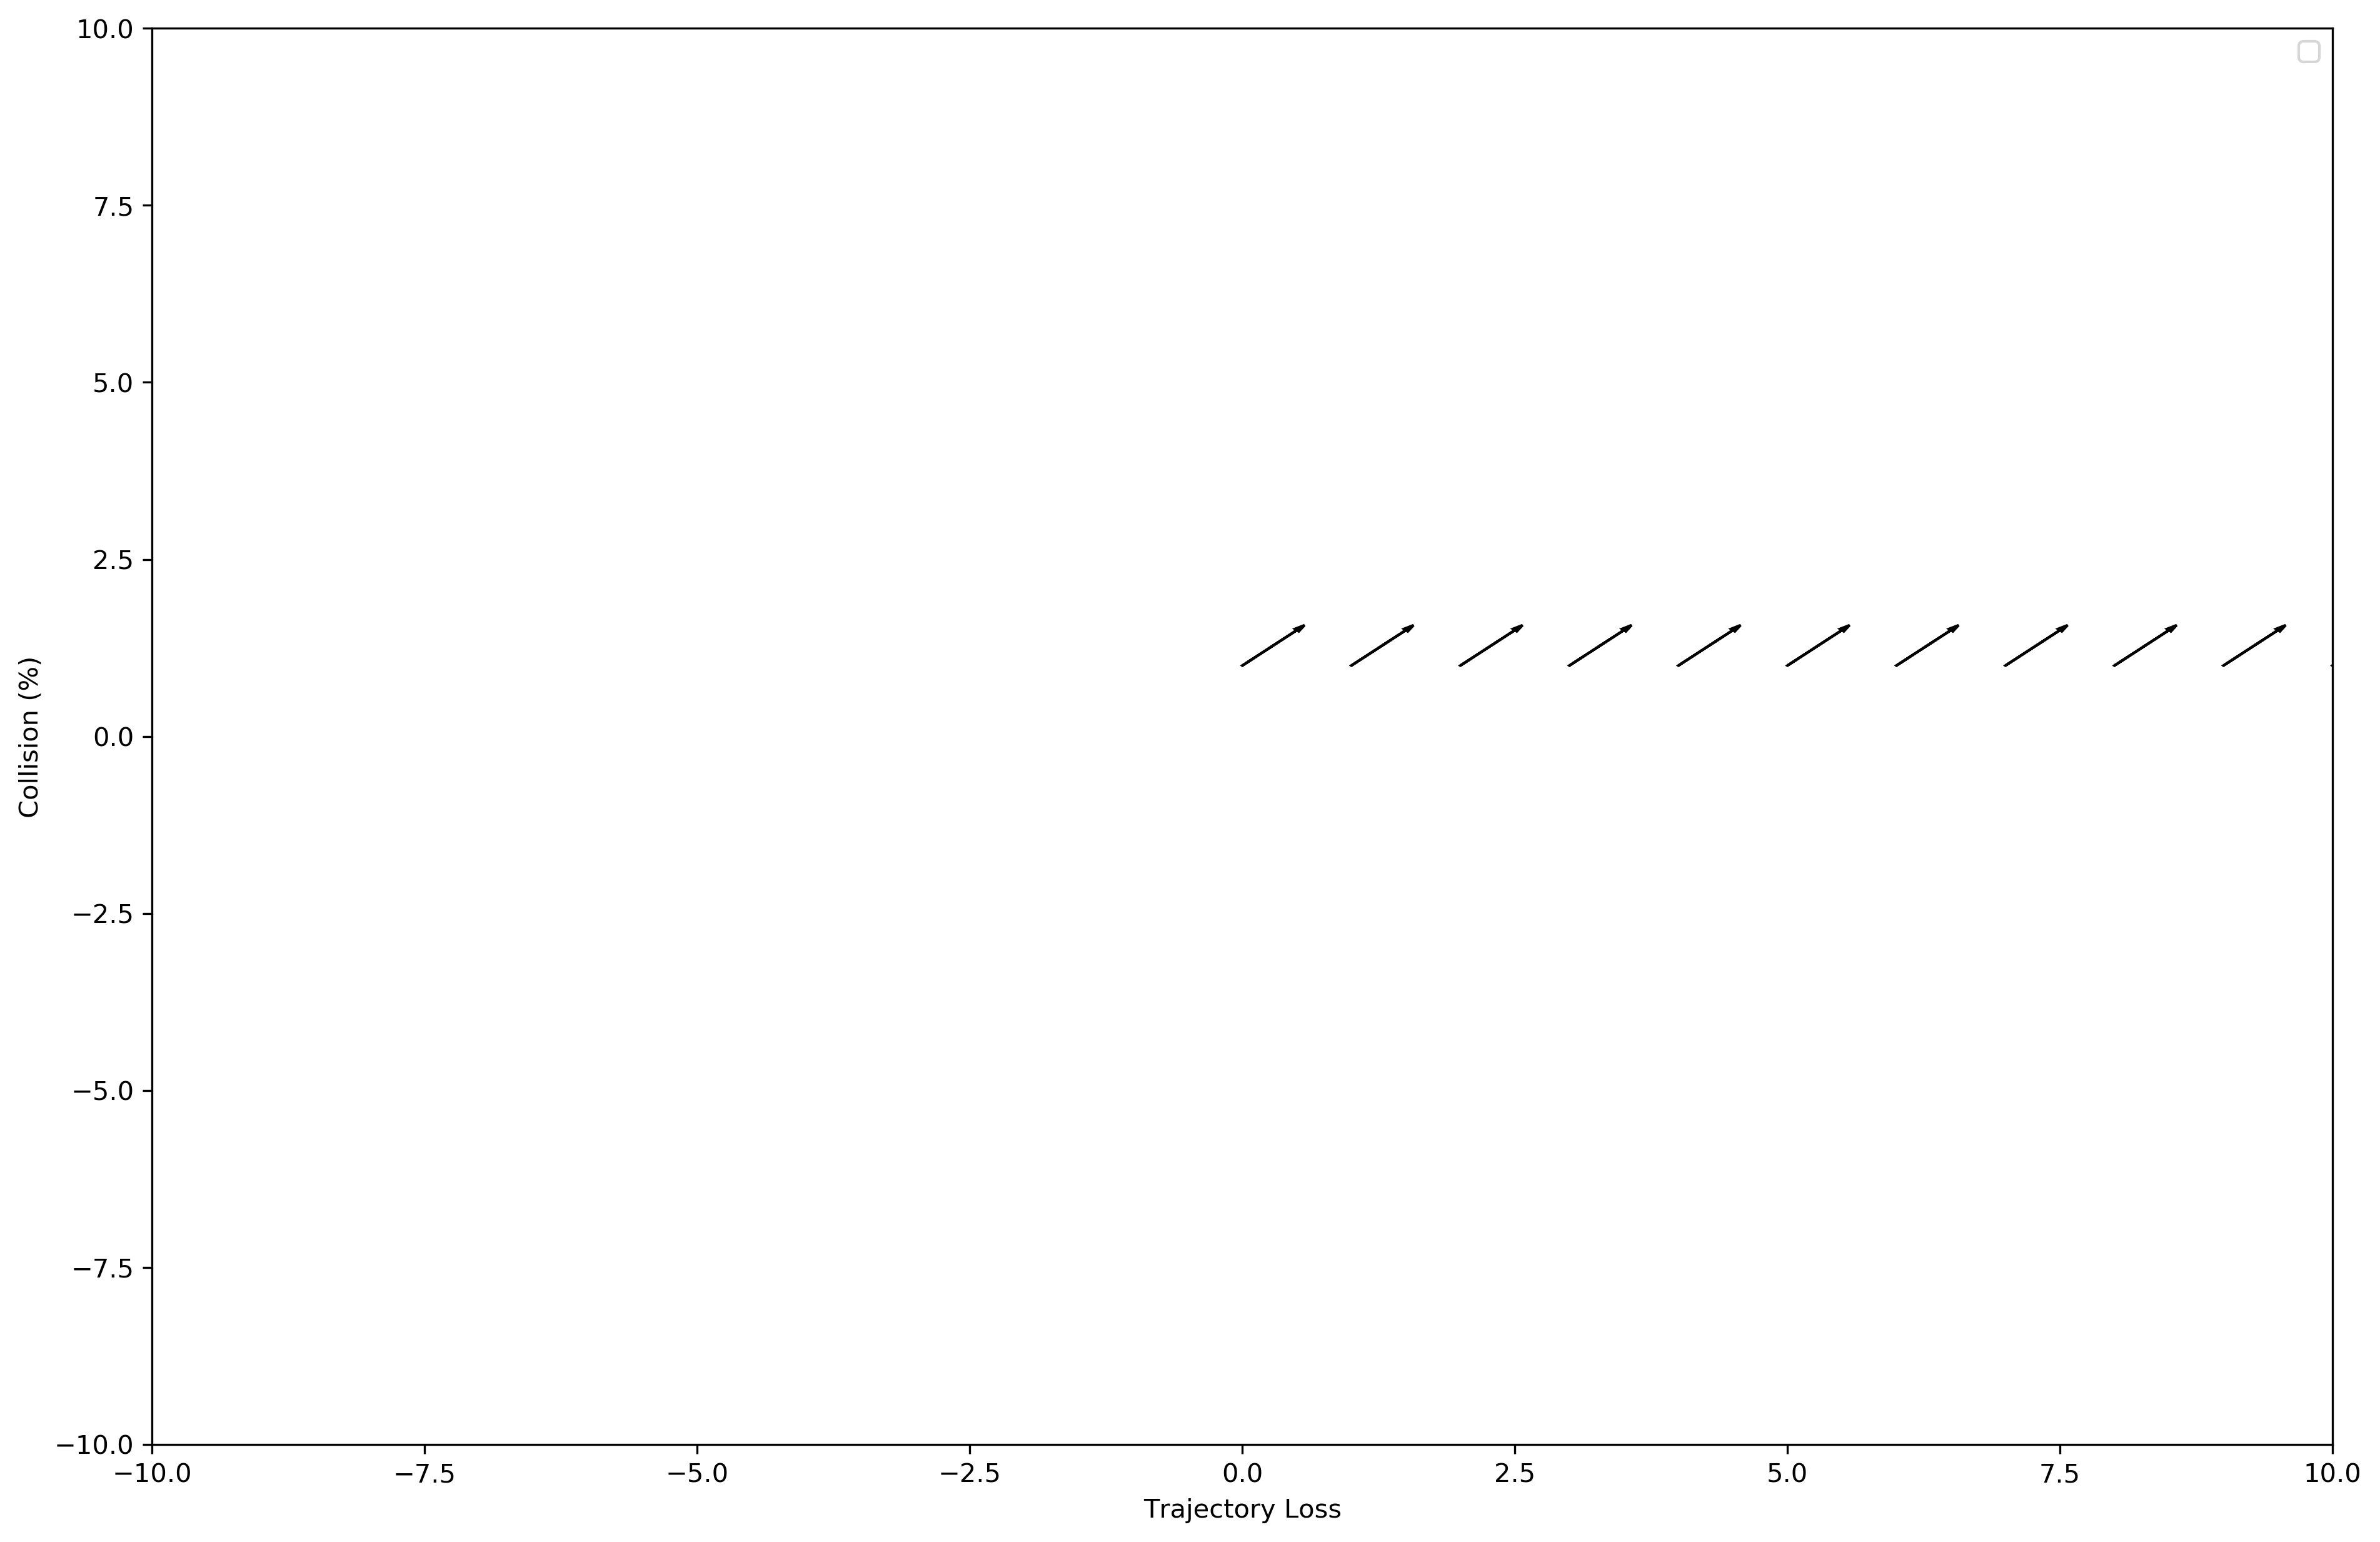

In [27]:
x, y = df['collision'].to_numpy(), df['trajectory_loss'].to_numpy()
dx, dy = df_aft['collision'].to_numpy()-x, df_aft['trajectory_loss'].to_numpy() - y

plt.figure(figsize=(15, 10), dpi=300)
#plt.scatter(y, x, label='Before adaptation')
#plt.scatter(y+dy, x+dx, label='After adaptation')
for i in range(len(x)) :
    plt.arrow(0+i, 0+1, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')

    #sns.lineplot([0, 0.025], [0, 30])
    #sns.lineplot( [ y[i],y[i]+dy[i]], [x[i], x[i]+dx[i]], color='b')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.ylabel('Collision (%)')
plt.xlabel('Trajectory Loss')
plt.legend()
plt.show()

In [4]:
results_baseline = torch.load('data/full_data_tests/results_baseline.pth')
results_contrastive = torch.load('data/full_data_tests/results_contrastive.pth')
results_trajpred = torch.load('data/full_data_tests/results_trajpred.pth')

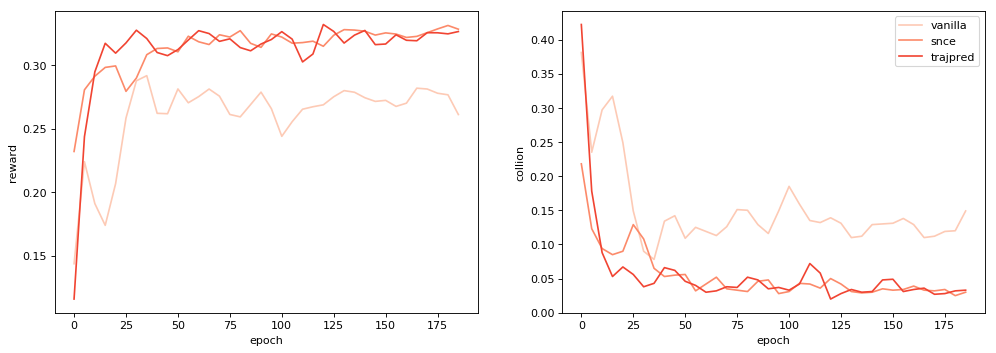

In [5]:
conv=2
results = [results_baseline, results_contrastive, results_trajpred]
labels = ['vanilla', 'snce', 'trajpred']
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=80, figsize=(15, 5))
rewards = [[r[1]['reward'] for r in res] for res in results]
collisions = [[r[1]['collision'] for r in res] for res in results]
for i, (rew, coll, lab) in enumerate(zip(rewards, collisions, labels)) :
    y_rew = np.convolve(rew, np.ones(conv)/conv, mode='valid')
    y_coll = np.convolve(coll, np.ones(conv)/conv, mode='valid')
    x = np.arange(len(y_rew))*5
    ax1.plot(x, y_rew, label=lab, c=cmap(norm(i)))
    ax2.plot(x, y_coll, label=lab, c=cmap(norm(i)))
ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')
ax1.set_ylabel('reward')
ax2.set_ylabel('collion')
plt.legend()
plt.show()

In [92]:
dfs = []
conv = 2
results = [results_trajpred, results_contrastive, results_baseline]
names = ['trajpred', 'snce', 'baseline']
for name, res in zip(names, results) :
    rewards = [r[1]['reward'] for r in res]
    epochs = np.arange(len(rewards)) * 5
    collisions = np.asarray([r[1]['collision'] for r in res]) * 100
    df = pd.DataFrame({'reward' : rewards, 'collision' : collisions, 'epoch' : epochs})
    df['reward_mean'] = df['reward'].rolling(2).mean()
    df['collision_mean'] = df['collision'].rolling(4).mean()
    df['method'] = name
    dfs.append(df)
df = pd.concat(dfs)

In [93]:
df['method'].unique()

array(['trajpred', 'snce', 'baseline'], dtype=object)

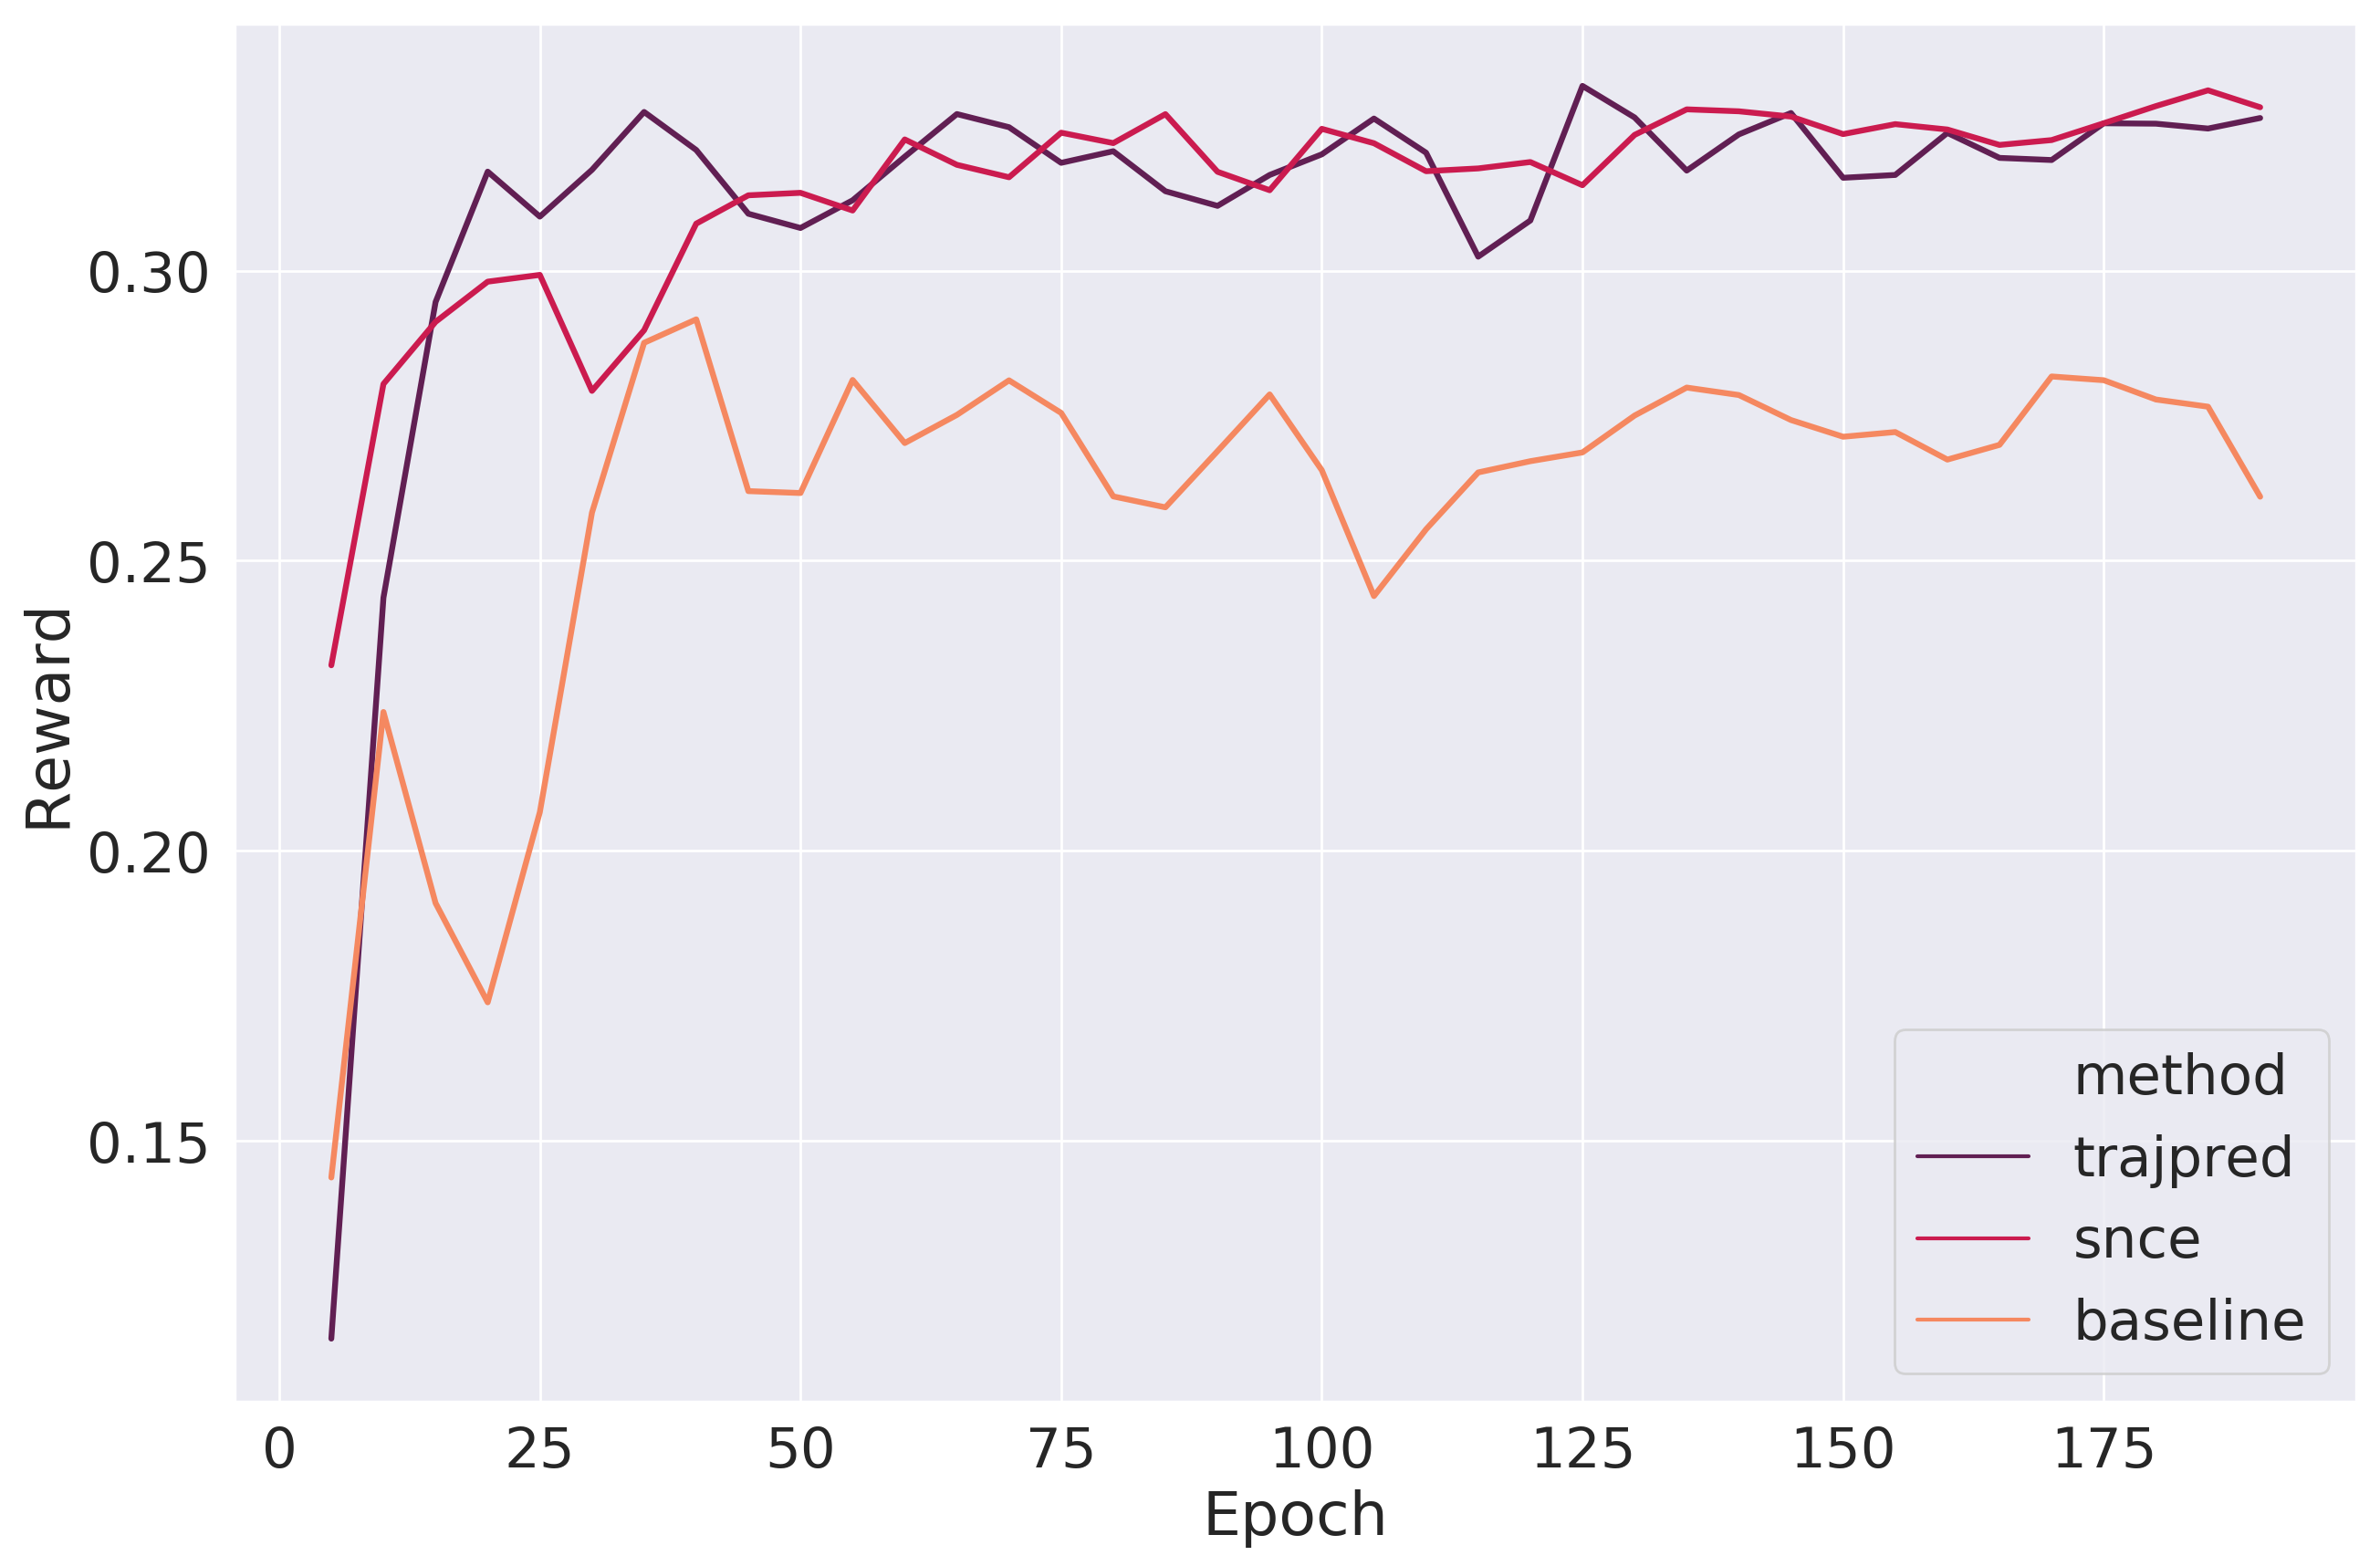

In [110]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plot = sns.lineplot(
        data=df,
        x="epoch", y="reward_mean", hue="method",
        markers=False, dashes=False, palette="rocket", linewidth=2.3,
    )
plot.set(xlabel='Epoch', ylabel='Reward')
plot.legend_.set_title(None)
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.set_dpi(200)
fig.savefig('rew.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

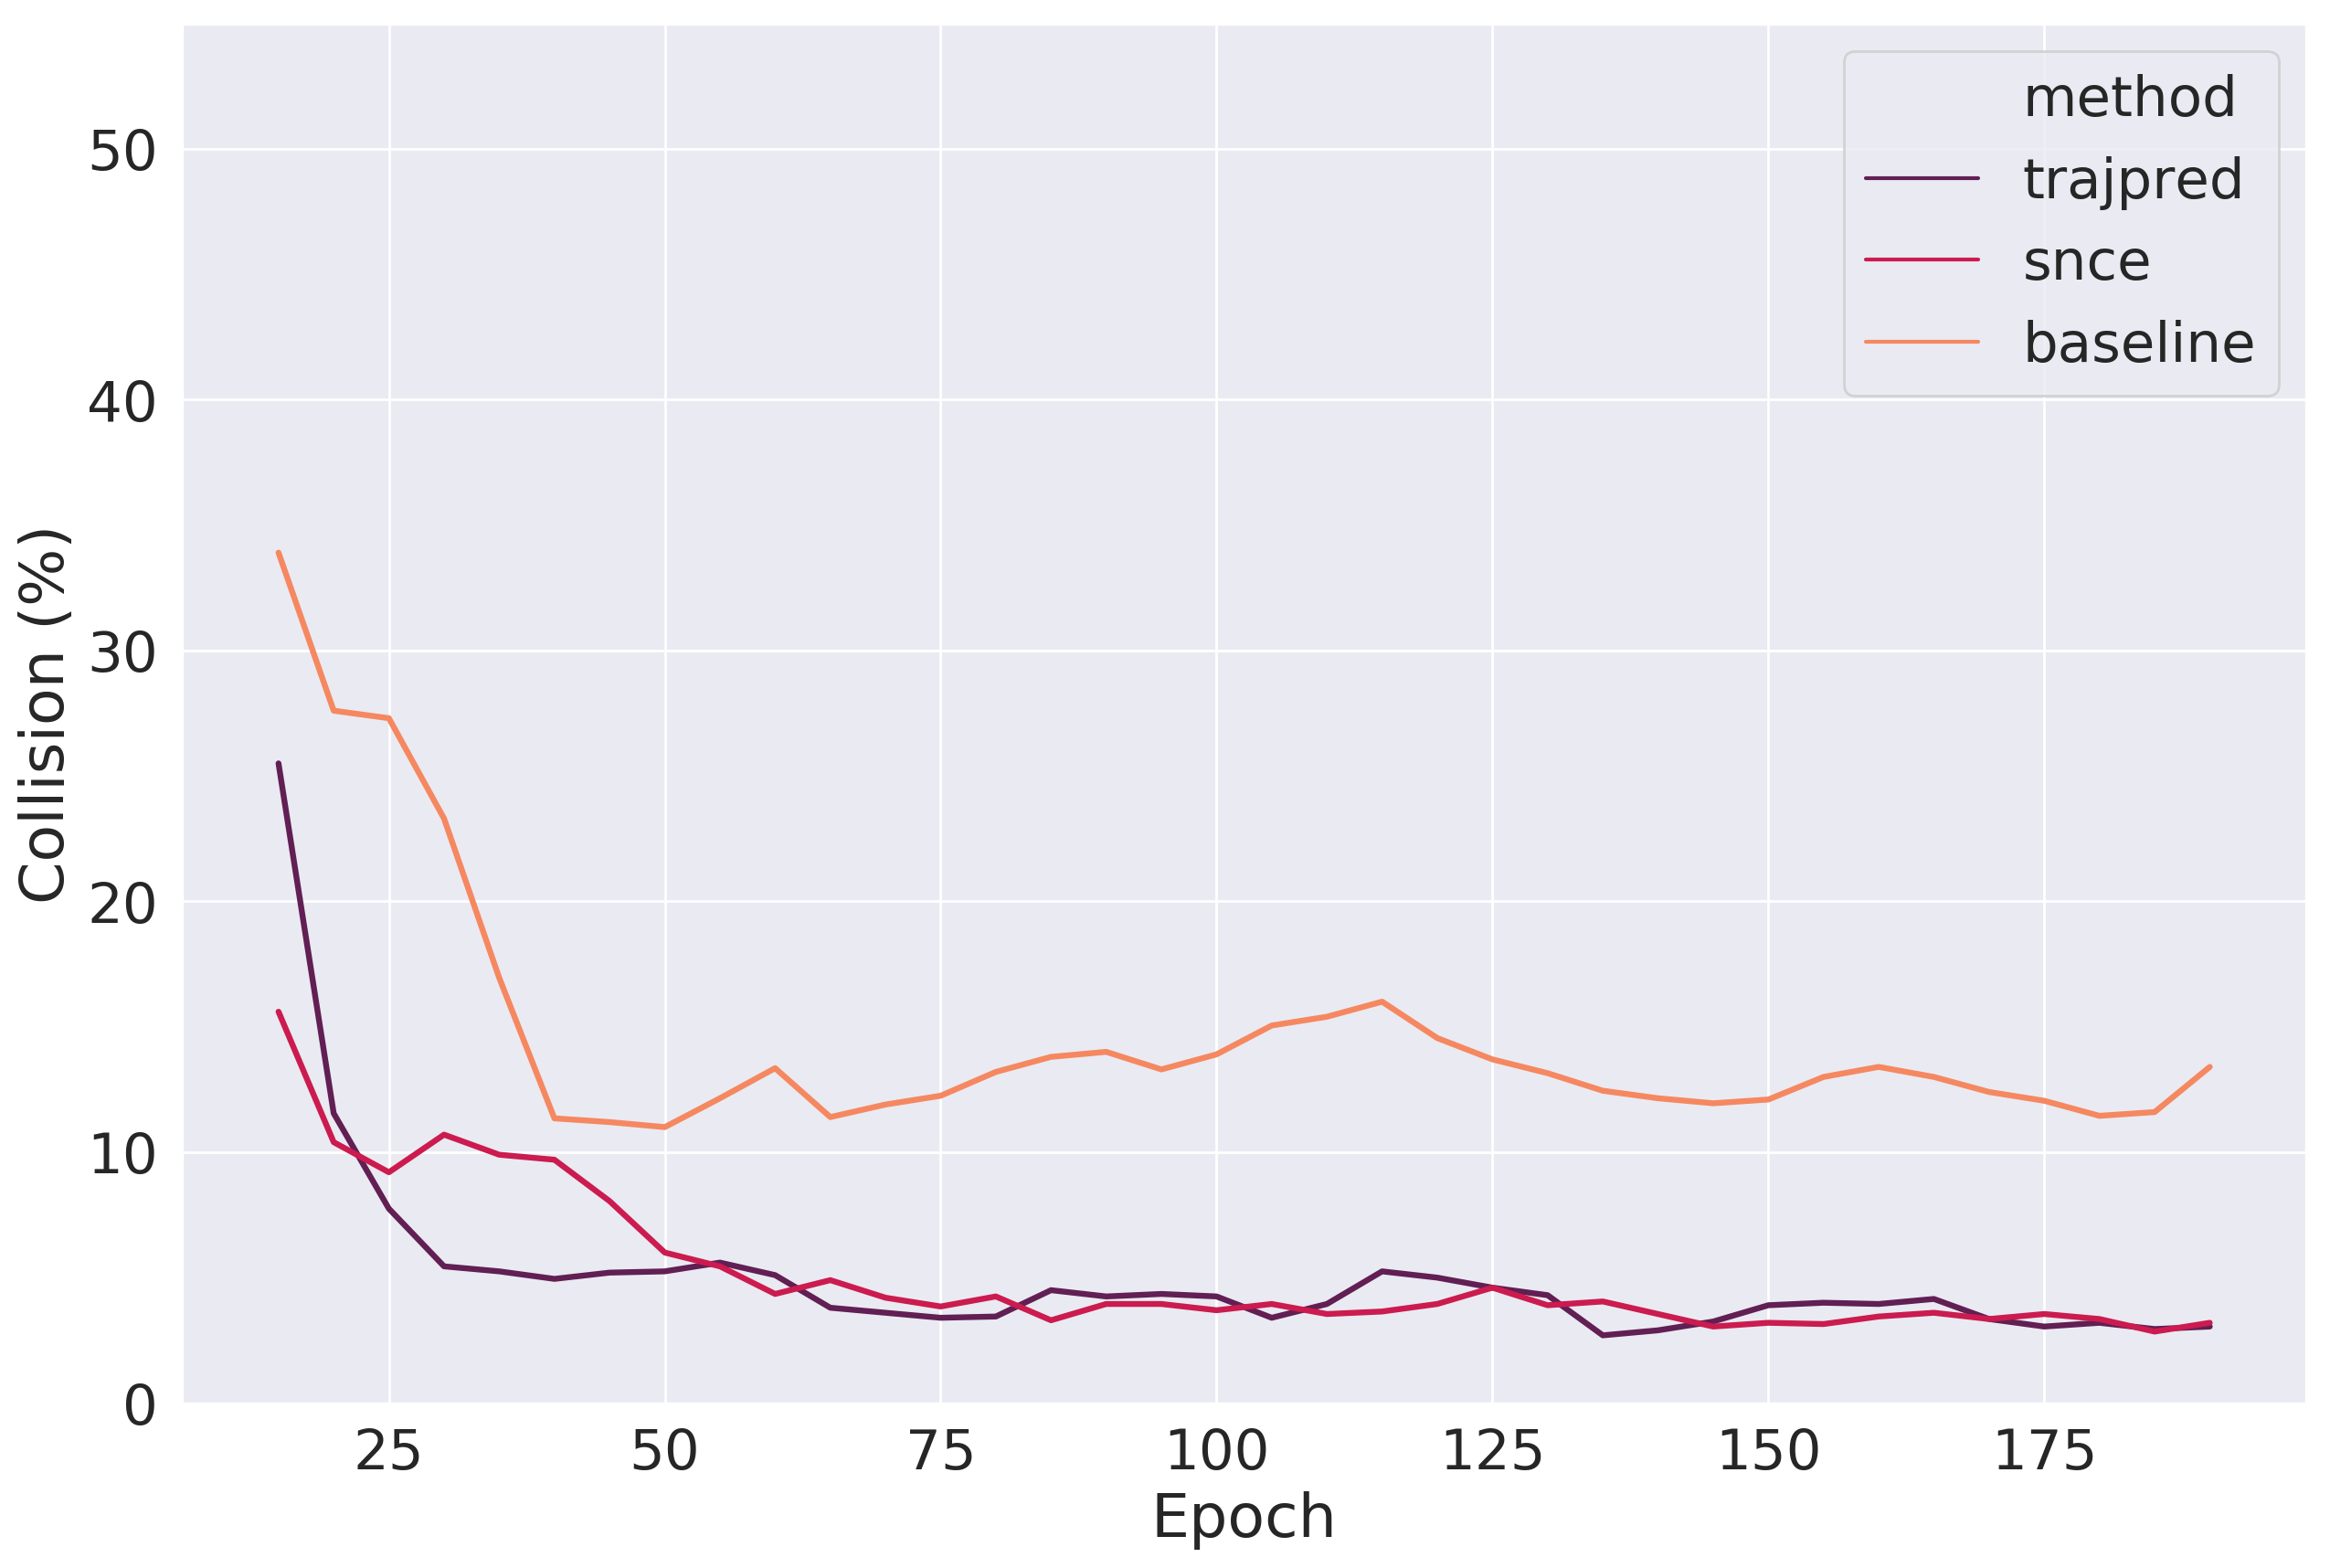

In [109]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plot = sns.lineplot(
        data=df,
        x="epoch", y="collision_mean", hue="method",
        markers=False, dashes=False, palette="rocket", linewidth=2.3,
    )

fig = plot.get_figure()
plot.set(ylim=(0.0, 55.0), xlabel='Epoch', ylabel='Collision (%)')
plot.legend_.set_title(None)
fig.set_size_inches(15, 10)
fig.set_dpi(200)
fig.savefig('col.png', dpi=300, bbox_inches='tight', pad_inches=0.1)